We begin this notebook by setting the default output plot sizes in this notebook:

In [1]:
options(repr.plot.width = 10)
options(repr.plot.height = 8)

# Multivariate Regression Tasks with `dt4` Dataset

In [2]:
cat(paste0("Last updated: ", Sys.Date()))

Last updated: 2018-12-26

As in the univariate case, we begin by loading the dataset:

In [3]:
dt4 <- read.csv(file = "http://www.principlesofeconometrics.com/poe5/data/csv/cps5_small.csv", sep = ",", dec = ".", header = TRUE)

It is always a good idea to get a general look at the data - to make sure that everything loaded correctly:

In [4]:
head(dt4)

black educ exper faminc female metro midwest south wage  west
1 0     13   45         0 1      1     0       0     44.44 1   
2 0     14   25     45351 1      1     1       0     16.00 0   
3 0     18   27     91946 1      1     0       0     15.38 0   
4 0     13   42     48370 0      1     1       0     13.54 0   
5 0     13   41     10000 1      1     0       0     25.00 1   
6 0     16   26    151308 1      1     0       0     24.05 0

Make sure that the data types assigned to each column are correct:

In [5]:
str(dt4)

'data.frame':	1200 obs. of  10 variables:
 $ black  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ educ   : int  13 14 18 13 13 16 16 18 21 14 ...
 $ exper  : int  45 25 27 42 41 26 11 15 32 12 ...
 $ faminc : int  0 45351 91946 48370 10000 151308 110461 0 67084 14000 ...
 $ female : int  1 1 1 0 1 1 1 1 0 0 ...
 $ metro  : int  1 1 1 1 1 1 1 1 1 0 ...
 $ midwest: int  0 1 0 1 0 0 0 1 1 0 ...
 $ south  : int  0 0 0 0 0 0 1 0 0 0 ...
 $ wage   : num  44.4 16 15.4 13.5 25 ...
 $ west   : int  1 0 0 0 1 0 0 0 0 1 ...


We can also get some summary statistics:

In [6]:
print(summary(dt4))

     black             educ          exper           faminc      
 Min.   :0.0000   Min.   : 0.0   Min.   : 0.00   Min.   :     0  
 1st Qu.:0.0000   1st Qu.:12.0   1st Qu.:12.00   1st Qu.:     0  
 Median :0.0000   Median :14.0   Median :24.00   Median : 23679  
 Mean   :0.0875   Mean   :14.2   Mean   :23.37   Mean   : 35304  
 3rd Qu.:0.0000   3rd Qu.:16.0   3rd Qu.:34.00   3rd Qu.: 53029  
 Max.   :1.0000   Max.   :21.0   Max.   :62.00   Max.   :469000  
     female         metro           midwest           south      
 Min.   :0.00   Min.   :0.0000   Min.   :0.0000   Min.   :0.000  
 1st Qu.:0.00   1st Qu.:1.0000   1st Qu.:0.0000   1st Qu.:0.000  
 Median :0.00   Median :1.0000   Median :0.0000   Median :0.000  
 Mean   :0.44   Mean   :0.8217   Mean   :0.2475   Mean   :0.325  
 3rd Qu.:1.00   3rd Qu.:1.0000   3rd Qu.:0.0000   3rd Qu.:1.000  
 Max.   :1.00   Max.   :1.0000   Max.   :1.0000   Max.   :1.000  
      wage             west       
 Min.   :  3.94   Min.   :0.0000  
 1st Q

Everything appears to be in order - we can move on to modelling.

# TASK 1
## - Plot the scatter plot of the dependent variable $Y$ and the independent variables $X_1,...,X_k$. 
## - Which variables $X_j$ visually appear to be related to $Y$? 
## - Are there any variables $X_i$, $X_j$ that seem to have a linear dependence between one another?

In this example data, we have the following:

- $Y$ in our case is `wage`;
- $X_j$ in our case are the remaining variables: `black`, `educ`, `exper`, `faminc`, `female`, `metro`, `south`, `midwest`, `west`.

We will begin by plotting pairwise scatter-plots for non-indicator variables:

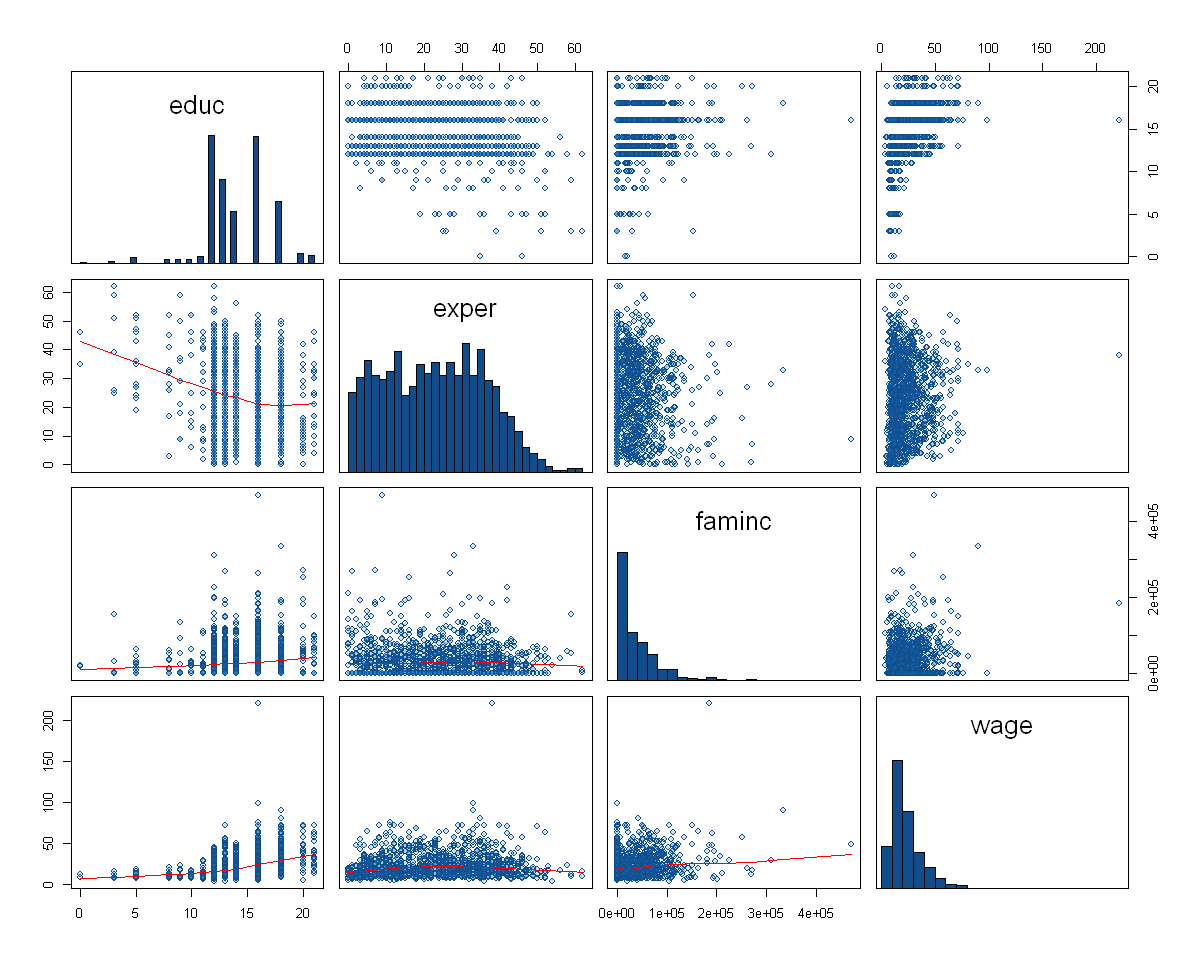

In [7]:
#From: https://stat.ethz.ch/R-manual/R-devel/library/graphics/html/pairs.html
panel.hist <- function(x, ...){
    usr <- par("usr"); on.exit(par(usr))
    par(usr = c(usr[1:2], 0, 1.5) )
    h <- hist(x, plot = FALSE, breaks = 30)
    breaks <- h$breaks; nB <- length(breaks)
    y <- h$counts; y <- y/max(y)
    rect(breaks[-nB], 0, breaks[-1], y, ...)
}
panel.cor <- function(x, y, digits = 2, prefix = "", cex.cor, ...){
    usr <- par("usr"); on.exit(par(usr))
    par(usr = c(0, 1, 0, 1))
    r <- abs(cor(x, y))
    txt <- format(c(r, 0.123456789), digits = digits)[1]
    txt <- paste0(prefix, txt)
    if(missing(cex.cor)) cex.cor <- 0.8/strwidth(txt)
    text(0.5, 0.5, txt, cex = 2)
}
#
pairs(dt4[, c('educ','exper', 'faminc', 'wage')],
      diag.panel = panel.hist, lower.panel = panel.smooth, #upper.panel = panel.cor, 
      col = "dodgerblue4", pch = 21, bg = adjustcolor("dodgerblue3", alpha = 0.2))

Note that the diagonal elements are the histogram of the variables, while the **upper** and **lower** triangle of the plot matrix are the scatter-plots of the same variables. So, we will examine thediagonal plots and the plots in either the upper, or lower, triangle.

From the plots we can say that:

- None of the variables appear to be normally distributed;
- The `wage` and `faminc` data **appears** to be scattered more for larger values of`wage`.
- There is a clear relationship between:
        - `educ` and `exper`;
        - `educ` and `faminc`;
        - `educ` and `wage`;
- The relationship between `exper` and `faminc` is not as clear from the plots;

We also see that the correlation between explanatory variables is weaker, compared to the correlation between `educ` and the remaining variables.

In [8]:
print(cor(dt4[, c('educ', 'exper', 'faminc', 'wage')]))

             educ       exper      faminc       wage
educ    1.0000000 -0.20264013  0.14831892 0.45533206
exper  -0.2026401  1.00000000 -0.02390775 0.07524787
faminc  0.1483189 -0.02390775  1.00000000 0.17019682
wage    0.4553321  0.07524787  0.17019682 1.00000000


We can also plot the scatter-matrix of the **whole dataset**:

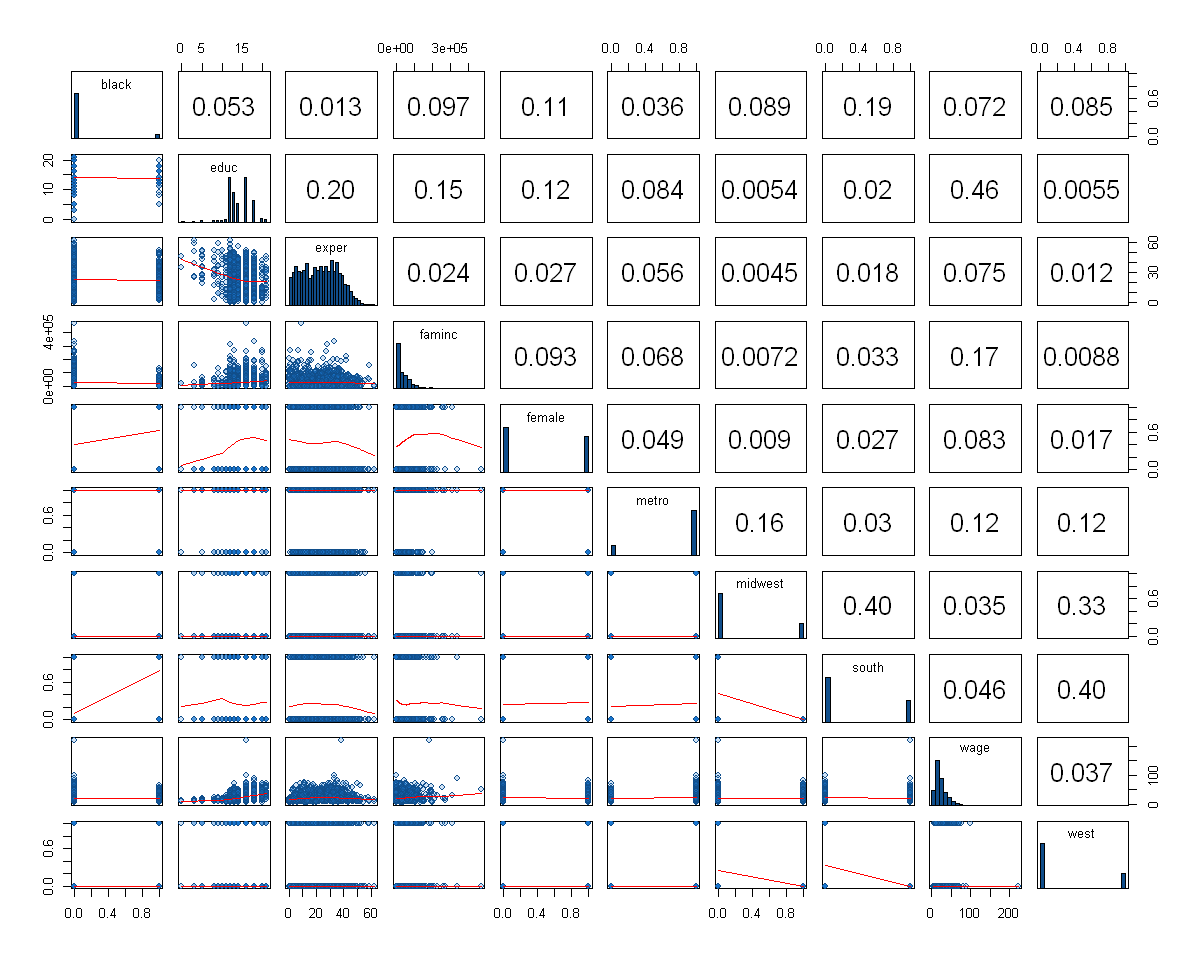

In [9]:
pairs(dt4, diag.panel = panel.hist, lower.panel = panel.smooth, upper.panel = panel.cor, 
      col = "dodgerblue4", pch = 21, bg = adjustcolor("dodgerblue3", alpha = 0.2))

Though for indicator variables these plots do not show much.

# TASK 2
## - Specify **one** regression in a mathematical formula notation based on economic theory. 
## - What coefficient sign do you expect $\beta_1,\beta_2,...$ to have? Explain. 

### Note: This is not necessarily the best regression - it is simply one you think makes economic sense.

We will quickly check if the regional indicator variables provided do not have all of the regions:

In [10]:
head(dt4[, c("south", "west", "midwest", "metro")])

south west midwest metro
1 0     1    0       1    
2 0     0    1       1    
3 0     0    0       1    
4 0     0    1       1    
5 0     1    0       1    
6 0     0    0       1

In [11]:
min(dt4[, "south"] + dt4[, "west"] + dt4[, "midwest"])

[1] 0

Since they do not sum to one - we can include all of the variable in our model without falling into a dummy variable trap (otherwise we would need to exclude one regional indicator variable from the model and treat it as a base region).

We can also look at their **frequency table**:

In [12]:
table(dt4[, "south"] + dt4[, "west"] + dt4[, "midwest"])


  0   1 
210 990 

Note that the maximum value is 1. If the maximum was 2 - this would show that some of the variables indicate something else, than the rest.

For example, if we include the `metro` indicator variable:

In [13]:
table(dt4[, "south"] + dt4[, "west"] + dt4[, "midwest"] + dt4[, "metro"])


  0   1   2 
 36 352 812 

We see that there are a number of rows that have a sum of 2, which means that `metro` indicates something else, rather than region.

In other words, `south`, `west` and `midwest` regions will be compared to a base `OTHER` region.

We will begin by specifying the following model:
$$
\begin{aligned}
\log(wage) &= \beta_0 + \beta_1 educ + \beta_2 educ^2 \\
&+ \beta_3 exper + \beta_4 exper^2 + \beta_5 metro + \beta_6 south + \beta_7 west + \beta_8 midwest + \beta_9 female + \beta_{10} black
\end{aligned}
$$

We expect the followign signs for the non-intercept coefficients:

- $\beta_1 > 0$ - additional years of education should increase the hourly `wage`;
- $\beta_2 > 0$ - generally it may be hard to say - with each additional year of education, the effect on `wage` may be lessened, however, if the additional year is for PhD-level education, then the additional year of education may have an **increased** effect on `wage`. For now, we will assume that is the case, i.e. $\beta_2 > 0$.
- $\beta_3 > 0$ - additional years of experience should increase the hourly `wage`;
- $\beta_4 < 0$ - generally, experience is **correlated with age**. Furthermore, **the lever of knowledge tends to even-out for each additional year of experience the more years of experience you have**. In other words, if you already have a lot of experience, then an additional year of experience would have a **lessened** (but not necessarily negative) effect on `wage`. Note: `exper^2` is alongside `exper`, so we do not know (as of right now), if there is a number of years of experience that results in a **decrease** in `wage`. We are assuming that it would result in an **increase, but at a lower rate** ($\beta_4 < 0$), compared to someone with less initial years of experience;
- $\beta_5 > 0$ - a [metropolitan](https://en.wikipedia.org/wiki/Metropolitan_area) is a highly dense population area. Generally, businesses are located in such high-density areas, and competition is higher. Consequently, we would expect someone from a metropolitan area to earn more than someone else, from the less-populated areas.
- $\beta_6, \beta_7, \beta_8$ - we are not sure of the sign as of yet. The **region may also be correlated with the metropolitan indicator variable**, as some regions could be less populated.
- $\beta_{9}, \beta_{10}$ - we are interested in evaluating if there is discrimination in the workforce (in which case these variables would be **negative**). Though it is important to note - as we will later see - the model may exhibit all sorts of problems - multicollinearity, autocorrelation, heteroskedasticity - which would result in **biased and/or insignificant** coefficients. **If our goal is to evaluate the effect - we should be careful that our model is correctly specified!**

We assume that other family income,`faminc`, should not affect the wage of a person, i.e. we treat it as **insignificant** variable, whose correlation may be **spurious** and as such, we do not include it in the model.

Note: it is possible to also include interaction variables in the model. As we already have 10 variables - we will skip this for now, but later on, we will examine some of these variables.

# TASK 3
## - Estimate the regression via OLS. 
## - Are the signs of $\beta_1,\beta_2,...$ the same as you expected?

In [14]:
mdl_0_fit <- lm(formula = "log(wage) ~ educ + I(educ^2) + exper + I(exper^2) + metro + south + west + midwest + female + black", data = dt4)
print(summary(mdl_0_fit))


Call:
lm(formula = "log(wage) ~ educ + I(educ^2) + exper + I(exper^2) + metro + south + west + midwest + female + black", 
    data = dt4)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.54406 -0.30670 -0.02875  0.30220  2.04174 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.5675625  0.1701082   9.215  < 2e-16 ***
educ         0.0456008  0.0228328   1.997 0.046036 *  
I(educ^2)    0.0021710  0.0008200   2.648 0.008216 ** 
exper        0.0285496  0.0035773   7.981 3.40e-15 ***
I(exper^2)  -0.0004207  0.0000716  -5.876 5.45e-09 ***
metro        0.1210310  0.0349935   3.459 0.000562 ***
south       -0.0944851  0.0392556  -2.407 0.016239 *  
west        -0.0438057  0.0409396  -1.070 0.284832    
midwest     -0.0500844  0.0412022  -1.216 0.224388    
female      -0.1757706  0.0268183  -6.554 8.32e-11 ***
black       -0.0373324  0.0477288  -0.782 0.434266    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual stan

----

P.S. If we specify our own power function, we can estimate the same model:

In [15]:
poly_var <- function(x, p){
    return(x^p)
}
print(summary(lm(formula = "log(wage) ~ educ + poly_var(educ, 2) + exper + poly_var(exper, 2) + metro + south + west + midwest + female + black", data = dt4)))


Call:
lm(formula = "log(wage) ~ educ + poly_var(educ, 2) + exper + poly_var(exper, 2) + metro + south + west + midwest + female + black", 
    data = dt4)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.54406 -0.30670 -0.02875  0.30220  2.04174 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         1.5675625  0.1701082   9.215  < 2e-16 ***
educ                0.0456008  0.0228328   1.997 0.046036 *  
poly_var(educ, 2)   0.0021710  0.0008200   2.648 0.008216 ** 
exper               0.0285496  0.0035773   7.981 3.40e-15 ***
poly_var(exper, 2) -0.0004207  0.0000716  -5.876 5.45e-09 ***
metro               0.1210310  0.0349935   3.459 0.000562 ***
south              -0.0944851  0.0392556  -2.407 0.016239 *  
west               -0.0438057  0.0409396  -1.070 0.284832    
midwest            -0.0500844  0.0412022  -1.216 0.224388    
female             -0.1757706  0.0268183  -6.554 8.32e-11 ***
black              -0.0373324  0.0477288  -

----

Going back to our case, we see that:

- the coefficients are the same as we would expect for `educ`, `exper` and their squared values;
- the coefficient of `metro` is also as we would expect;
- the regional coefficients are negative and **insignificant for west and midwest**, indicating that the regions themselves (since only one of them is significant) may not be indicative of different wages. On the other hand, it may be possible that people working in the `south` region earn significantly less than people in **all of the remaining regions** (other + west + midwest), however, **we can only check this if we remove the remaining regional variables and only leave the south variable**.
- coefficient sign of`female` is negative and significant, indicating possible discrimination in the work force (again, this is only the inital model, so we cannot be sure yet);
- coefficient sign of `black` is negatuve but it is **insignificant**, indicating that there is no racial discrimination.

# TASK 4
## - Test, which variables are statistically significant. 
## - Remove the insignificant variables (leave the initial estimated model as a separate variable).

We want to separately test the hypothesis that a coefficient is significant: 
$$
H_0: \beta_j = 0\\
H_1: \beta_j \neq 0
$$
The test is automatically carried out and the $t$-statistic and $p$-values are presented in the model summary output. 

Insignificant variables are those, whose $p$-value is greater than the 0.05 significance level:

In [16]:
print(round(coef(summary(mdl_0_fit)), 4))

            Estimate Std. Error t value Pr(>|t|)
(Intercept)   1.5676     0.1701  9.2151   0.0000
educ          0.0456     0.0228  1.9972   0.0460
I(educ^2)     0.0022     0.0008  2.6475   0.0082
exper         0.0285     0.0036  7.9808   0.0000
I(exper^2)   -0.0004     0.0001 -5.8761   0.0000
metro         0.1210     0.0350  3.4587   0.0006
south        -0.0945     0.0393 -2.4069   0.0162
west         -0.0438     0.0409 -1.0700   0.2848
midwest      -0.0501     0.0412 -1.2156   0.2244
female       -0.1758     0.0268 -6.5541   0.0000
black        -0.0373     0.0477 -0.7822   0.4343


We will begin by removing the insignificant variable (where the $p$-value is greater than 0.05) with the largest $p$-values - in this case it is the indicator variable `black`.

In [17]:
mdl_1_fit <- lm(formula = "log(wage) ~ educ + I(educ^2) + exper + I(exper^2) + metro + south + west + midwest + female", data = dt4)
print(round(coef(summary(mdl_1_fit)), 4))

            Estimate Std. Error t value Pr(>|t|)
(Intercept)   1.5671     0.1701  9.2140   0.0000
educ          0.0452     0.0228  1.9809   0.0478
I(educ^2)     0.0022     0.0008  2.6787   0.0075
exper         0.0286     0.0036  7.9841   0.0000
I(exper^2)   -0.0004     0.0001 -5.8753   0.0000
metro         0.1202     0.0350  3.4363   0.0006
south        -0.0982     0.0390 -2.5198   0.0119
west         -0.0431     0.0409 -1.0528   0.2926
midwest      -0.0493     0.0412 -1.1974   0.2314
female       -0.1780     0.0267 -6.6784   0.0000


Next up, we will remove the indicartor variable `west`. Then we will remove the indicator variable `midwest`. We note that after doing so, the base group would be `other` + `west` + `midwest`.

In [18]:
mdl_2_fit <- lm(formula = "log(wage) ~ educ + I(educ^2) + exper + I(exper^2) + metro + south + midwest + female", data = dt4)
print(round(coef(summary(mdl_2_fit)), 4))

            Estimate Std. Error t value Pr(>|t|)
(Intercept)   1.5358     0.1675  9.1708   0.0000
educ          0.0459     0.0228  2.0134   0.0443
I(educ^2)     0.0022     0.0008  2.6549   0.0080
exper         0.0287     0.0036  8.0315   0.0000
I(exper^2)   -0.0004     0.0001 -5.9101   0.0000
metro         0.1180     0.0349  3.3800   0.0007
south        -0.0728     0.0306 -2.3775   0.0176
midwest      -0.0242     0.0336 -0.7211   0.4710
female       -0.1783     0.0267 -6.6884   0.0000


In [19]:
mdl_3_fit <- lm(formula = "log(wage) ~ educ + I(educ^2) + exper + I(exper^2) + metro + south + female", data = dt4)
print(round(coef(summary(mdl_3_fit)), 4))

            Estimate Std. Error t value Pr(>|t|)
(Intercept)   1.5288     0.1672  9.1462   0.0000
educ          0.0452     0.0228  1.9819   0.0477
I(educ^2)     0.0022     0.0008  2.6950   0.0071
exper         0.0287     0.0036  8.0298   0.0000
I(exper^2)   -0.0004     0.0001 -5.9063   0.0000
metro         0.1219     0.0345  3.5362   0.0004
south        -0.0640     0.0281 -2.2797   0.0228
female       -0.1788     0.0266 -6.7125   0.0000


The coefficient of the indicator variable `black` is insignificant, so we remove it as well.

# TASK 5
## - Write down the final (with significant variables) estimated regression formula.

From the model output we can write down the estimated model as:

$$
\begin{aligned}
\underset{(se)}{\widehat{\log(wage)}} &= \underset{(0.167)}{1.5288} + \underset{(0.023)}{0.0452} \cdot educ + \underset{(0.001)}{0.0022} \cdot educ^2 \\
&+ \underset{(0.004)}{0.0287} \cdot exper - \underset{(0.0001)}{0.0004} \cdot exper^2 \\
&+ \underset{(0.034)}{0.1219} \cdot metro - \underset{(0.028)}{0.0640} \cdot south - \underset{(0.027)}{0.1788} \cdot female 
\end{aligned}
$$

------

## **[START OF ADDITIONAL INFO]**

Furthermore, we can interpret the variables in the following way:

- An increasse in `educ` (education) by `1 year` results in an **increasing effect** on `wage` (i.e. the positive effect on `wage` is further increased depending on the initial level of `eudc`), **ceteris paribus**:
  - If `educ = 0` and then increases by $1$ year, then `wage` increases by $100 \cdot (0.0452 + 0.0022) = 4.74\%$;
  - If `educ > 0` and then increases by $1$ year, then the difference in the change in `educ` results in:
  $$
  \begin{aligned}
  \underset{(se)}{\widehat{\log(wage)}} \bigg|_{educ + 1} - \underset{(se)}{\widehat{\log(wage)}} \bigg|_{educ} &= 0.0452 + 0.0022 \cdot (educ + 1)^2 - 0.0022 \cdot educ^2\\
  &= 0.0452 + 0.0022 \cdot (2 \cdot educ + 1)
  \end{aligned}
  $$
  then `wage` increases by $100 \cdot \left[ 0.0452 + 0.0022 \cdot (2 \cdot educ + 1) \right] \%$
- An increase in `exper` (years of experience) by `1 year` results in a **decreasing effect** on `wage` (i.e. the positive effect on `wage` is decreased depending on the initial level of `exper`, **ceteris paribus**:
  - If `exper = 0` increases by $1$ year, then `wage` increases by $100 \cdot (0.0287 - 0.0004) = 2.83\%$;
  - If `exper > 0` increases by $1$ year, then the difference in the change in `exper` results in:
    $$
  \begin{aligned}
  \underset{(se)}{\widehat{\log(wage)}} \bigg|_{exper + 1} - \underset{(se)}{\widehat{\log(wage)}} \bigg|_{exper} &= 0.0287  - 0.0004 \cdot (exper + 1)^2 + 0.0004 \cdot exper^2\\
  &= 0.0287  - 0.0004 \cdot (2 \cdot exper + 1)
  \end{aligned}
  $$
  then `wage` **changes** by $100 \cdot \left[ 0.0452 + 0.0022 \cdot (2 \cdot exper + 1) \right] \%$.
  - We may be interested in finding whether there are values of `exper` that result in a maximum (or minimum) value of `wage`, **ceteris paribus**. Taking the partial derivative (calculating the marginal effect) and equating it to zero yields:
$$
\begin{aligned}
\dfrac{\partial {\widehat{\log(wage)}}}{\partial exper} &= 0.0287  - 0.0004 \cdot 2 \cdot educ = 0.0287  - 0.0008 \cdot exper = 0
\end{aligned}
$$

In [20]:
print(cbind(coef(mdl_3_fit)))
print(paste0("Maximum Wage when exper = ", coef(mdl_3_fit)[4] / (-coef(mdl_3_fit)[5] * 2)))

                     [,1]
(Intercept)  1.5288186273
educ         0.0451561515
I(educ^2)    0.0022043871
exper        0.0286929931
I(exper^2)  -0.0004225372
metro        0.1219206689
south       -0.0639986987
female      -0.1788345181
[1] "Maximum Wage when exper = 33.9532119669792"


So, when $exper = 33.95$, `wage` will be at its **maximum** since $\dfrac{\partial^2 {\widehat{\log(wage)}}}{\partial^2 exper} < 0$.

Note that we used the **exact values** instead of the rounded values from the formulas. Reason being that the rounding error would give us a different value:

In [21]:
0.0287 / 0.0008

[1] 35.875

Which would not be the same, one we try with to verify the results with the actual data.

  - We can further examine when a unit increase in `exper` results in **no change in wage**:
  $$
  \begin{aligned}
  0.0287  - 0.0004 \cdot (2 \cdot educ + 1) &= 0
  \end{aligned}
  $$

In [22]:
zero_inc <- (coef(mdl_3_fit)[4] / (- coef(mdl_3_fit)[5]) - 1) / 2
print(zero_inc)

   exper 
33.45321 


So, if the initial value of $exper = 33.45$, `wage` would not change with an additional **unit** increase in `exper`. **Remember that`exper` can only be integer-valued**.

Furthermore, for $exper > 33.45$, `wage` would **decrease** from a unit increase in `exper`. We can verify this by taking the initial value `exper = 36`:

In [23]:
# Repeat the first row twice:
tst_dt <- dt4[c(1, 1), ]
# Reset row index numbering to avoid duplicate row index numbers
rownames(tst_dt) <- NULL
# Set `exper` column values:
tst_dt[, "exper"] = c(36, 37)
# Print the sample data:
print(tst_dt)

  black educ exper faminc female metro midwest south  wage west
1     0   13    36      0      1     1       0     0 44.44    1
2     0   13    37      0      1     1       0     0 44.44    1


Note the **ceteris paribus** condition - **there is only only a unit change in `exper`, while the remaining values are do not change**. 

Now, we can calculate and compare the predicted values:

In [24]:
tst_pred <- predict(mdl_3_fit, newdata = tst_dt)
print(tst_pred)

       1        2 
2.916816 2.914663 


In [25]:
print(diff(tst_pred))

           2 
-0.002152226 


which would be a $0.215\%$ **decrease in wage** for someone with 36 years of experience earning an additional year of experience.

This can be verified manually, by taking the exponents of the predicted values (since these predicted values are from the log-linear model) and caluclating their percentage change:
$$
\dfrac{WAGE_{NEW} - WAGE_{OLD}}{WAGE_{OLD}} \cdot 100
$$

In [26]:
print(diff(exp(tst_pred)) / exp(tst_pred[1]) * 100)

         2 
-0.2149911 


We note that this is an **approximation** only, and not a true equality between logarithm differences and percentage change. 

**It is very close when the percentage change is small, but for larger percentage changes, it may differ greatly.**

- Another example when the wage would still increase is when someone has 33 years of experience and it increases to 34 (since the maximum is attained when `exper = 34.95`):

In [27]:
tst_dt[, "exper"] <- c(33, 34)
print(tst_dt)

  black educ exper faminc female metro midwest south  wage west
1     0   13    33      0      1     1       0     0 44.44    1
2     0   13    34      0      1     1       0     0 44.44    1


In [28]:
tst_pred <- predict(mdl_3_fit, newdata = tst_dt)
print(tst_pred)

       1        2 
2.918202 2.918585 


In [29]:
print(diff(tst_pred))

           2 
0.0003829979 


- On the other hand, if we were to **ignore** that `exper` is only integer valued, then we can verify the point, where `wage` does not change from a unit incease in `exper`:

In [30]:
tst_dt[, "exper"] <- c(zero_inc, zero_inc + 1)
print(tst_dt)

  black educ    exper faminc female metro midwest south  wage west
1     0   13 33.45321      0      1     1       0     0 44.44    1
2     0   13 34.45321      0      1     1       0     0 44.44    1


In [31]:
tst_pred <- predict(mdl_3_fit, newdata = tst_dt)
print(tst_pred)

      1       2 
2.91848 2.91848 


In [32]:
diff(tst_pred)

2 
0

- Continuing our coefficient interpretation:
 - A person from a metropolitan area (`metro = 1`) earns around $100 \cdot 0.1219 = 12.19\%$ more than someone **not from a metro area**, ceteris paribus;
 - A person from the south region (`south = 1`) earns around $100 \cdot 0.0640 = 6.4\%$ **less** (since the coefficient is $-0.0640 < 0$) than someone **not from the south**.     
   - Take note that we have removed other regional coefficients, and as a result, we are left with only one regional indicator. Consequently, we only compare someone from the south, versus someone not from the south (they could be from either west, midwest, or another region). 
   - If we were to **leave other regional indicator variables**, then the south indicator variable would indicate how much more/less someone from the south earns compared to **some other base region cateogry, which does NOT include west or midwest**.
   - As a result, this coefficient also indicates that the wages in the south are lower than wages in the rest of the country.
 - If the person is female (`female = 1`), then they earn around $100 \cdot 0.1788 = 17.88\%$ **less** than someone who is not female.
 
## **[END OF ADDITIONAL INFO]**

---

# TASK 6
## - Examine the residual plots. 
## - Test for normality, autocorrelation, heteroskedasticity. 
## - Do the residuals violate our (MR.3) - (MR.6) model assumptions?

In [33]:
# Define the plot layout matrix:
layout_mat <- matrix(c(1, 1, 2, 2, 3, 3, 3, 3), nrow = 2, byrow = TRUE)
print(layout_mat)

     [,1] [,2] [,3] [,4]
[1,]    1    1    2    2
[2,]    3    3    3    3


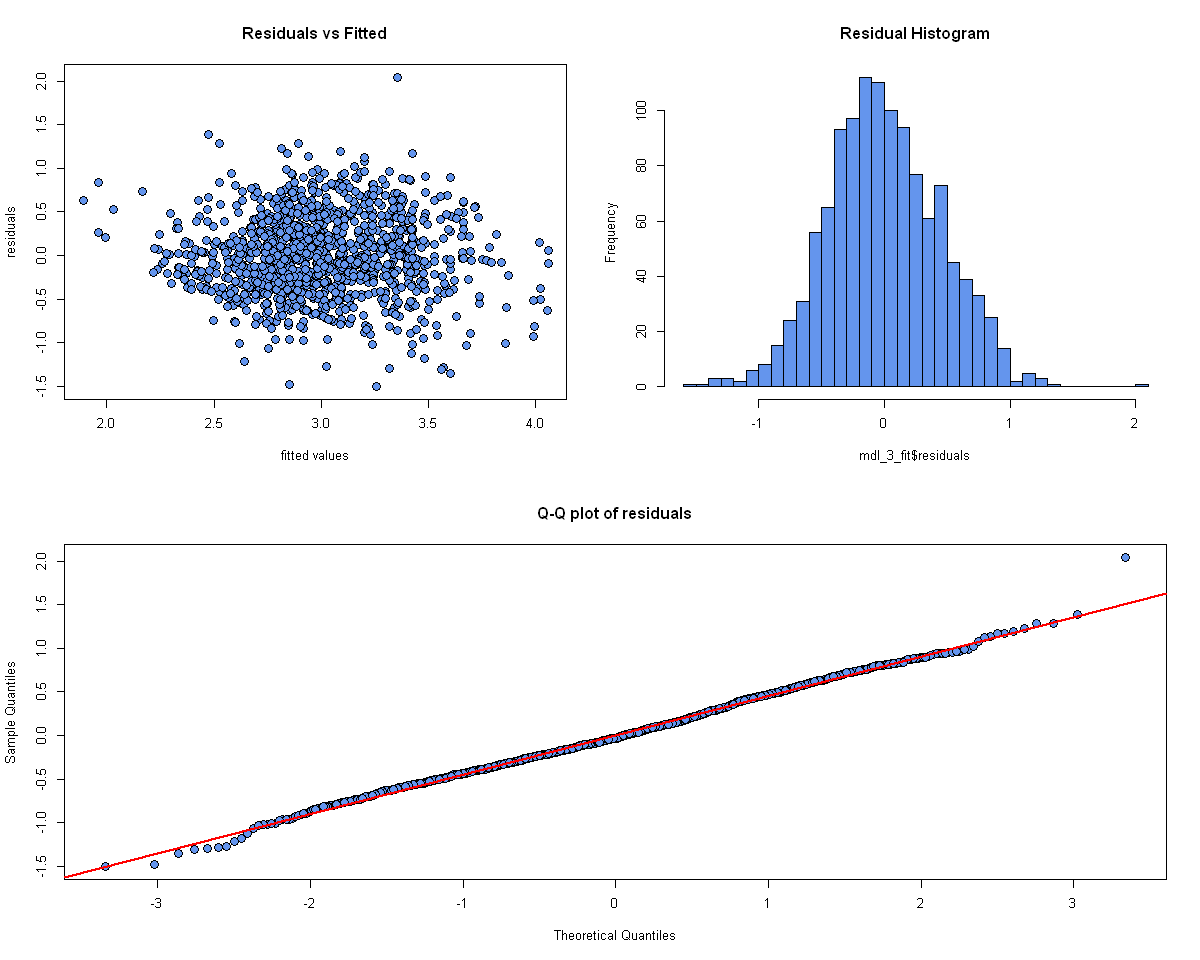

In [34]:
layout(layout_mat)
plot(mdl_3_fit$fitted.values, mdl_3_fit$residuals, type = "p", pch = 21, bg = "cornflowerblue", main = "Residuals vs Fitted", ylab = "residuals", xlab = "fitted values", cex = 1.5)
hist(mdl_3_fit$residuals, col = "cornflowerblue", breaks = 30, main = "Residual Histogram")
qqnorm(mdl_3_fit$residuals, main = "Q-Q plot of residuals", pch = 21, bg = "cornflowerblue", cex = 1.5)
qqline(mdl_3_fit$residuals, col = "red", lwd = 2)

We can see that:

- From the residual vs. fitted plot - the residuals appear to havea a constant variance, though there are some points that have large residual values for low fitted values (fitted values are on the horizontal axis), and low residual values for very large fitted values, but those points do not make up a majority (the heteroskedasticity test will help us answer whether their variance is the same across observations).
- From fhe residual histogram the residuals appear to be normal, though the histogram does appear to have a longer right tail;
- The residuals in the Q-Q plot appear to fall along a straight line with the theoretical quantiles of a normal distribution, **except** for one point (which is most likely an outlier).

Next, we move on to testing a few hypothesis.

### Homoskedasticity tests

The hypothesis that we want to test is:
$$
\begin{cases}
H_0&: \gamma_1 = 0 \text{ (residuals are homoskedastic)}\\
H_1&: \gamma_1 \neq 0 \text{ (residuals are heteroskedastic)}
\end{cases}
$$

We will begin with the **Breusch-Pagan Test**:

In [35]:
# Breusch–Pagan Test
print(lmtest::bptest(mdl_3_fit))


	studentized Breusch-Pagan test

data:  mdl_3_fit
BP = 32.841, df = 7, p-value = 2.835e-05



We have that the $p$-value < 0.05, so we reject the null hypothesis that the residuasl are homoskedastic. Which means that the residuals are heteroskedastic.

Next, we look at the **Goldfeld-Quandt Test** results:

In [36]:
# Goldfeld–Quandt Test
print(lmtest::gqtest(mdl_3_fit, alternative = "two.sided"))


	Goldfeld-Quandt test

data:  mdl_3_fit
GQ = 0.93247, df1 = 592, df2 = 592, p-value = 0.3953
alternative hypothesis: variance changes from segment 1 to 2



The $p$-value > 0.05, so we have no grounds to reject the null hypothesis and conclude that the residuals are homoskedastic.

Finally, we look at the **White Test** results:

In [37]:
# White Test
print(lmtest::bptest(mdl_3_fit, ~ metro*south*midwest*female*educ*exper + I(educ^2) + I(exper^2), data = dt4))


	studentized Breusch-Pagan test

data:  mdl_3_fit
BP = 85.387, df = 49, p-value = 0.0009915



The White test returns the results in the same order as the **BP** test. So, the $p$-value < 0.05, so we reject the null hypothesis and conclude that the residuals are heteroskedastic.

### **From these test results we can say that the residuals are heteroskedastic**.

#### Autocorrelation Tests

The hypothesis that we want to test is:
$$
\begin{cases}
H_0&:\text{the errors are serially uncorrelated}\\
H_1&:\text{the errors are autocorrelated (the exact order of the autocorrelation depends on the test carried out)}
\end{cases}
$$

We will begin with the **Durbin-Watson Test**, where the alternative hypothesis is that the **autocorrelation is of order 1**:

In [38]:
# Durbin–Watson Test
print(lmtest::dwtest(mdl_3_fit, alternative = "two.sided"))


	Durbin-Watson test

data:  mdl_3_fit
DW = 2.0221, p-value = 0.7047
alternative hypothesis: true autocorrelation is not 0



The **DW** statistic is close to 2, so we do not reject the null hypothesis that there is no serial correlation.

Next up is the **Breusch-Godfrey Test**, where we can select the autocorrelation order ourselves. We have selected a 2nd order autocorrelation:

In [39]:
# Breusch-Godfrey Test
print(lmtest::bgtest(mdl_3_fit, order = 2))


	Breusch-Godfrey test for serial correlation of order up to 2

data:  mdl_3_fit
LM test = 0.20846, df = 2, p-value = 0.901



The **BG** test returns the values in the same order as the **BP** test. the $p$-value = 0.901018 > 0.05, so we have no grounds to reject the null hypothesis of no autocorrelation.

We could test with higher order autocorrelation and examine the results, lets try with up to order 20:

In [40]:
for(i in 2:20){
    print(paste0("BG Test for autocorrelation order = ", i, "; p-value = ", round(lmtest::bgtest(mdl_3_fit, order = i)$p.value, 5)))
}

[1] "BG Test for autocorrelation order = 2; p-value = 0.90102"
[1] "BG Test for autocorrelation order = 3; p-value = 0.30049"
[1] "BG Test for autocorrelation order = 4; p-value = 0.28286"
[1] "BG Test for autocorrelation order = 5; p-value = 0.24209"
[1] "BG Test for autocorrelation order = 6; p-value = 0.24766"
[1] "BG Test for autocorrelation order = 7; p-value = 0.33798"
[1] "BG Test for autocorrelation order = 8; p-value = 0.2663"
[1] "BG Test for autocorrelation order = 9; p-value = 0.35112"
[1] "BG Test for autocorrelation order = 10; p-value = 0.37166"
[1] "BG Test for autocorrelation order = 11; p-value = 0.41263"
[1] "BG Test for autocorrelation order = 12; p-value = 0.47018"
[1] "BG Test for autocorrelation order = 13; p-value = 0.41332"
[1] "BG Test for autocorrelation order = 14; p-value = 0.485"
[1] "BG Test for autocorrelation order = 15; p-value = 0.55692"
[1] "BG Test for autocorrelation order = 16; p-value = 0.50146"
[1] "BG Test for autocorrelation order = 17; p-valu

As we can see, we have no grounds to reject the null hypothesis of autocorrelation in any of the cases.

### **From these test results we can conclude that the residuals are not serially correlated**.

#### Normality Tests

The hypothesis that we want to test is:
$$
\begin{cases}
H_0&:\text{residuals follow a normal distribution}\\
H_1&:\text{residuals do not follow a normal distribution}
\end{cases}
$$

We will carry our the following tests and combine their $p$-values a single output:

In [41]:
norm_tests = c("Anderson-Darling", 
              "Shapiro-Wilk", 
              "Kolmogorov-Smirnov", 
              "Cramer–von Mises", 
              "Jarque–Bera")

In [42]:
norm_test <- data.frame(
    p_value = c(nortest::ad.test(mdl_3_fit$residuals)$p.value,
                shapiro.test(mdl_3_fit$residuals)$p.value,
                ks.test(mdl_3_fit$residuals, y = "pnorm", alternative = "two.sided")$p.value,
                nortest::cvm.test(mdl_3_fit$residuals)$p.value,
                tseries::jarque.bera.test(mdl_3_fit$residuals)$p.value),
    Test = norm_tests)
print(norm_test)

Warning message in ks.test(mdl_3_fit$residuals, y = "pnorm", alternative = "two.sided"):
"ties should not be present for the Kolmogorov-Smirnov test"

      p_value               Test
1 0.004300244   Anderson-Darling
2 0.009834369       Shapiro-Wilk
3 0.000000000 Kolmogorov-Smirnov
4 0.003654743   Cramer–von Mises
5 0.062915984        Jarque–Bera


We see that the $p$-value is less than the $5\%$ significance level for the **Anderson-Darling**, **Shapiro-Wilk** and **Kolmogorov-Smirnov** tests, where we would reject the null hypothesis of normality. On the other hand the $p$-value is greater than 0.05 for **Cramer-von Mises** and **Jarque-Bera** tests, where we would not reject the null hypothesis of normality.

As indicated in the lecture notes, that Shapiro–Wilk has the best power for a given significance, furthermore, 3 our of 5 tests suggest non-normal residuals, so we will go with their results.

### **From these test results we can conclude that the residuals are not normally distributed**.

**OVERALL CONCLUSIONS**:
 - Residuals are not serially correlated (**asuumption (MR.4) is NOT violated**);
 - Residuals are Heteroskedastic (**assumption (MR.3) IS violated**);
 - Residuals are non-normally distributed (**assumption (MR.6) IS violated**).
 
Assumption **(MR.5)**  is related to multicollinearity and will be examined in a later TASK. But from what we have seen so far, almost all of the coefficients are statistically significant, with correct signs. Furthermore, since we were able to estimate the model via OLS, there is not exact collinearity (i.e. no exact linear dependence) between the regressors. So, there may be no collinear variables in our model.

-----
-----
-----

## Comparison With Univariate Regression Model Results

If we look back at our final univariate regression model - the log-linear model:
$$
\underset{(se)}{\widehat{\log(\text{wage})}} = \underset{(0.0702)}{1.5968} + \underset{(0.0048)}{0.0988} \cdot \text{educ}
$$
We can estimate it here as well, and re-examine its residuals:

In [43]:
lm_univar_fit <- lm(formula = "log(wage) ~ educ", data = dt4)
print(coef(summary(lm_univar_fit)))

              Estimate Std. Error  t value     Pr(>|t|)
(Intercept) 1.59683536 0.07018017 22.75337 1.530466e-95
educ        0.09875341 0.00484219 20.39437 1.344896e-79


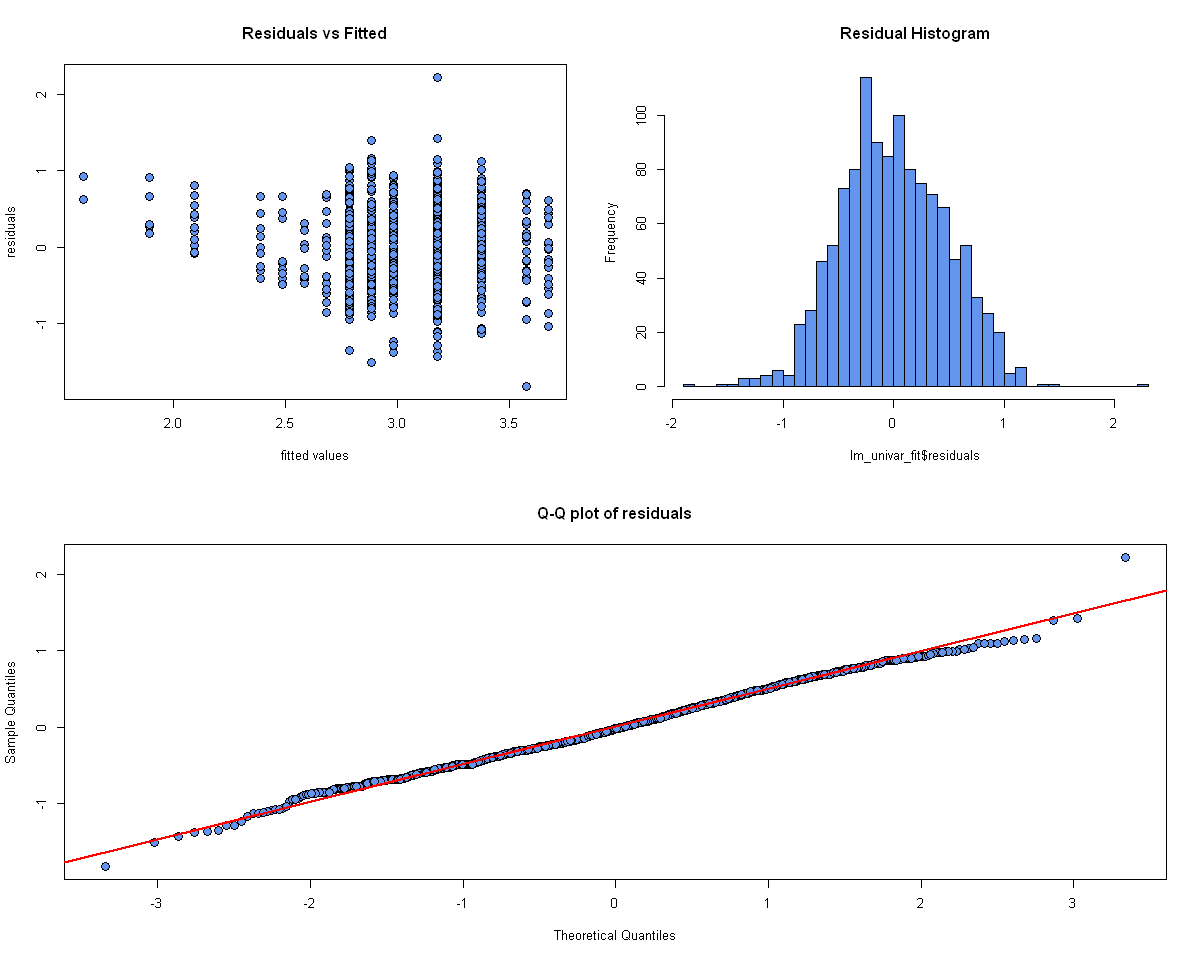

In [44]:
layout(layout_mat)
plot(lm_univar_fit$fitted.values, lm_univar_fit$residuals, type = "p", pch = 21, bg = "cornflowerblue", main = "Residuals vs Fitted", ylab = "residuals", xlab = "fitted values", cex = 1.5)
hist(lm_univar_fit$residuals, col = "cornflowerblue", breaks = 30, main = "Residual Histogram")
qqnorm(lm_univar_fit$residuals, main = "Q-Q plot of residuals", pch = 21, bg = "cornflowerblue", cex = 1.5)
qqline(lm_univar_fit$residuals, col = "red", lwd = 2)

Compared to the univariate model:
    
- **The residual vs fitted value plot visually looks better in the multivariate model**;
- The residual histogram is similar, but visually looks a bit better in the multivariate model;
- The residual Q-Q plots are similar in both cases - the outlier still remains in the data.

Again note that the fitted values are on the horizontal axis, which also highlights another interesting poitns regarding the range of attainable fitted values in these models.

Looking at the residual vs fitted value plot, the number of fitted values, greater than 3.2, but less than 3.35 is:

- For the univariate regression with one variable:

In [45]:
length(lm_univar_fit$fitted.values[lm_univar_fit$fitted.values > 3.2 & lm_univar_fit$fitted.values < 3.35])

[1] 0

- For the multiple regression:

In [46]:
length(mdl_3_fit$fitted.values[mdl_3_fit$fitted.values > 3.2 & mdl_3_fit$fitted.values < 3.35])

[1] 140

**By using the multivariate regression mode specification we now get fitted values, which are more evenly scattered across their interval, whereas in the univaraite case, we had fitted values clustered along a limited range**.

-----
-----
-----

# TASK 7
## - Add interaction variables to your model, provide an interpretation for what kind of sign you expect. 
## - Then, estimate the model and check if they are significant. If they are - re-examine the residuals.

To make everything easier to follow, we will examine the interaction terms one-by one, so as not to overwhelm with too many variables in the model.

- It may be interesting to include the interaction term:
$$
female \times black
$$
to see if there is a **different** discrimination for females based on race.

In [47]:
mdl_4_fit <- lm(formula = "log(wage) ~ educ + I(educ^2) + exper + I(exper^2) + metro + south + female*black", data = dt4)
print(summary(mdl_4_fit))


Call:
lm(formula = "log(wage) ~ educ + I(educ^2) + exper + I(exper^2) + metro + south + female*black", 
    data = dt4)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.50887 -0.30359 -0.03361  0.30317  2.04037 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.5286334  0.1672632   9.139  < 2e-16 ***
educ          0.0455267  0.0228054   1.996 0.046127 *  
I(educ^2)     0.0021819  0.0008191   2.664 0.007831 ** 
exper         0.0286890  0.0035758   8.023 2.45e-15 ***
I(exper^2)   -0.0004227  0.0000716  -5.904 4.62e-09 ***
metro         0.1227632  0.0345186   3.556 0.000391 ***
south        -0.0599383  0.0286125  -2.095 0.036397 *  
female       -0.1766135  0.0280101  -6.305 4.04e-10 ***
black        -0.0352303  0.0740225  -0.476 0.634204    
female:black -0.0008156  0.0950710  -0.009 0.993156    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4543 on 1190 degrees of freedom
Multiple R-square

Note that we may want to have a more readable format, which can be achieved with the [stargazer](https://cran.r-project.org/web/packages/stargazer/vignettes/stargazer.pdf) pacakge.

**Both `black` and `female * black` are insignificant, so we can remove them from the regression.**

**Alternatively, we may want to carry out an $F$-test** to test the joint hypothesis that:
$$
\begin{cases}
H_0&: \beta_{female} = 0, \beta_{black} = 0, \beta_{female \times black} = 0\\
H_1&: \text{at least one of the tested parameters is not zero}
\end{cases}
$$

If fail to reject the null hypothesis, then both race and gender have no significant effect on the model.

In [48]:
print(car::linearHypothesis(mdl_4_fit, c("female=0", "black=0", "female:black=0")))

Linear hypothesis test

Hypothesis:
female = 0
black = 0
female:black = 0

Model 1: restricted model
Model 2: log(wage) ~ educ + I(educ^2) + exper + I(exper^2) + metro + south + 
    female * black

  Res.Df    RSS Df Sum of Sq      F    Pr(>F)    
1   1193 254.99                                  
2   1190 245.58  3     9.403 15.188 1.055e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Since the $p$-value < 0.05, we reject the null hypothesis and conclude that at least one of the variables is statistically significant.

If we only look at the joint hypothesis for `black` and `female:black`:

In [49]:
print(car::linearHypothesis(mdl_4_fit, c("black=0", "female:black=0")))

Linear hypothesis test

Hypothesis:
black = 0
female:black = 0

Model 1: restricted model
Model 2: log(wage) ~ educ + I(educ^2) + exper + I(exper^2) + metro + south + 
    female * black

  Res.Df    RSS Df Sum of Sq    F Pr(>F)
1   1192 245.70                         
2   1190 245.58  2   0.11559 0.28 0.7558


Then we do not reject the null hypothesis that **both `black` and `female:black` are not statistically significant** and thus we can remove them **both** from our model.

We can also do this with the **ANOVA** test: by specifying the **restricted model under the null**:

In [50]:
mdl_4_restricted_fit <- lm(formula = "log(wage) ~ educ + I(educ^2) + exper + I(exper^2) + metro + south", data = dt4)
print(anova(mdl_4_restricted_fit, mdl_4_fit))

Analysis of Variance Table

Model 1: log(wage) ~ educ + I(educ^2) + exper + I(exper^2) + metro + south
Model 2: log(wage) ~ educ + I(educ^2) + exper + I(exper^2) + metro + south + 
    female * black
  Res.Df    RSS Df Sum of Sq      F    Pr(>F)    
1   1193 254.99                                  
2   1190 245.58  3     9.403 15.188 1.055e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [51]:
mdl_4_restricted_fit <- lm(formula = "log(wage) ~ educ + I(educ^2) + exper + I(exper^2) + metro + south + female", data = dt4)
print(anova(mdl_4_restricted_fit, mdl_4_fit))

Analysis of Variance Table

Model 1: log(wage) ~ educ + I(educ^2) + exper + I(exper^2) + metro + south + 
    female
Model 2: log(wage) ~ educ + I(educ^2) + exper + I(exper^2) + metro + south + 
    female * black
  Res.Df    RSS Df Sum of Sq    F Pr(>F)
1   1192 245.70                         
2   1190 245.58  2   0.11559 0.28 0.7558


We see that we get the exact same $F$-statistic and the exact same $p$-value. So, we can use either method to carry out the $F$-test for multiple coefficient significance (i.e. multiple restricitons).

Note: we may omit `print()` to get a more concise output:

In [52]:
car::linearHypothesis(mdl_4_fit, c("black=0", "female:black=0"))

Res.Df RSS      Df Sum of Sq F         Pr(>F)   
1 1192   245.6975 NA        NA        NA        NA
2 1190   245.5819  2 0.1155884 0.2800494 0.7557962

In [53]:
anova(mdl_4_restricted_fit, mdl_4_fit)

Res.Df RSS      Df Sum of Sq F         Pr(>F)   
1 1192   245.6975 NA        NA        NA        NA
2 1190   245.5819  2 0.1155884 0.2800494 0.7557962

Do note though, when working with `.R` scripts or via a command terminal (e.g. when executing the scripts on a remote server) the `print()` command is essential for printing output, whereas wimply calling the function would not print the result by default.

- We may also be interested if an additional year of education has a different effect based on gender: $female \times educ$. Since the coefficient of `female` is negative, it would be interesting to see, whether a higher education has a different effect based on a persons gender.

In [54]:
mdl_4_fit <- lm(formula = "log(wage) ~ educ + I(educ^2) + exper + I(exper^2) + metro + south + female*educ", data = dt4)
print(summary(mdl_4_fit))


Call:
lm(formula = "log(wage) ~ educ + I(educ^2) + exper + I(exper^2) + metro + south + female*educ", 
    data = dt4)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.56830 -0.30514 -0.01967  0.30933  2.05993 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.588e+00  1.688e-01   9.403  < 2e-16 ***
educ         4.460e-02  2.275e-02   1.961 0.050141 .  
I(educ^2)    1.921e-03  8.259e-04   2.326 0.020164 *  
exper        2.894e-02  3.569e-03   8.110 1.25e-15 ***
I(exper^2)  -4.254e-04  7.143e-05  -5.956 3.40e-09 ***
metro        1.254e-01  3.445e-02   3.641 0.000283 ***
south       -6.528e-02  2.803e-02  -2.329 0.020029 *  
female      -4.903e-01  1.391e-01  -3.525 0.000440 ***
educ:female  2.171e-02  9.518e-03   2.281 0.022710 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4532 on 1191 degrees of freedom
Multiple R-squared:  0.3548,	Adjusted R-squared:  0.3505 
F-statistic: 81.88 on 8 an

We note that the $p$-value of `educ` is close to 0.05. On the other hand the interaction variable between gender and education is significant (as well as the squared education, $educ^2$), so we will leave the variables included. We will further motivate this decision via the $F$-test.

Looking at the $F$-test for the hypothesis:
$$
\begin{cases}
H_0&: \beta_{educ} = 0, \beta_{female \times educ} = 0\\
H_1&: \text{at least one of the tested parameters is not zero}
\end{cases}
$$

In [55]:
car::linearHypothesis(mdl_4_fit, c("educ=0", "educ:female=0"))

Res.Df RSS      Df Sum of Sq F        Pr(>F)    
1 1193   246.5071 NA      NA         NA         NA
2 1191   244.6286  2 1.87853   4.572911 0.01050985

----

Note: **THE NAMES OF THE INTERACTION VARIABLE MUST MATCH EXACTLY THE ONES IN THE OUTPUT**. The coefficient names can be viewed by:

In [56]:
t(names(coef(mdl_4_fit)))

[,1]        [,2] [,3]      [,4]  [,5]       [,6]  [,7]  [,8]   [,9]       
[1,] (Intercept) educ I(educ^2) exper I(exper^2) metro south female educ:female

If we use `female:educ` instead of `educ:female` - we would get **an error**:

In [57]:
tryCatch({
    car::linearHypothesis(mdl_4_fit, c("educ=0", "female:educ=0"))
}, error = function(e) {
   print(e)
})

Warning message in constants(lhs, cnames_symb):
"NAs introduced by coercion"

<simpleError in constants(lhs, cnames_symb): The hypothesis "female:educ=0" is not well formed: contains bad coefficient/variable names.>


Note: in order to avoid our code breaking, we wrap the code in a `tryCatch({...})` and have a function specifially to deal with errors. In this case, it simply prints the error. In practice, we may need to save the output to a separate file, or have additional methods to handle any possible errors.

----

The $p$-value is less than 0.05, so we reject the null hypothesis and conclude that at least one variable is statistically significant.

However, removing only `educ`, but leaving the interaction term would further complicate interpretation, especially since its $p$ value is so close to the $5\%$ significance level. If we relax the significance level, the nall the variables are statistically significant **at the 0.1 ($10\%$) significance level**.

**INTERPRETATION**:

Looking at the model coefficients:
$$
\begin{aligned}
\underset{(se)}{\widehat{\log(wage)}} &= \underset{(0.1688)}{1.5876} + \underset{(0.0227)}{0.0446} \cdot educ + \underset{(0.0008)}{0.0019} \cdot educ^2 \\
&+ \underset{(0.0036)}{0.0289} \cdot exper - \underset{(0.0001)}{0.0004} \cdot exper^2 \\
&+ \underset{(0.0345)}{0.1254} \cdot metro - \underset{(0.0280)}{0.0653} \cdot south \\
&- \underset{(0.1391)}{0.4903} \cdot female + \underset{(0.0095)}{0.0217} \cdot \left(female \times educ\right)
\end{aligned}
$$

or, with a little bit of rearranging, to highlight the effect of gender, we get:
$$
\begin{aligned}
\underset{(se)}{\widehat{\log(wage)}} &= \underset{(0.1688)}{1.5876} + \underset{(0.0227)}{0.0446} \cdot educ + \underset{(0.0008)}{0.0019} \cdot educ^2 \\
&+ \underset{(0.0036)}{0.0289} \cdot exper - \underset{(0.0001)}{0.0004} \cdot exper^2 \\
&+ \underset{(0.0345)}{0.1254} \cdot metro - \underset{(0.0280)}{0.0653} \cdot south \\
&+ \left(\underset{(0.0095)}{0.0217} \cdot educ  - \underset{(0.1391)}{0.4903}\right) \cdot female
\end{aligned}
$$

a possible interpretation could be as follows: if the person is female, then their $\log(wage)$ differs by $\left(\underset{(0.0095)}{0.0217} \cdot educ  - \underset{(0.1391)}{0.4903}\right)$, compared to males (or **the base** non-female **group**), ceteris paribus.

By specifying this model we can see how much education offsets discrimination based on gender. Notice that in this case, if `educ = 0`, then there is a large difference in wage - the wage is **lwoer** by around $100 \cdot 0.4903 = 49.03 \%$ for females.

**HOWEVER**, if we look at the sample data:

In [58]:
dt4[dt4[, "educ"] == 0, ]

black educ exper faminc female metro midwest south wage  west
813  0     0    46    20000  0      0     0       1     12.50 0   
1083 0     0    35    17000  1      1     0       0      9.19 1

We only have **two cases** when `educ = 0` - **ONE FOR FEMALES** and **ONE FOR MALES**. Looking at the difference:

In [59]:
(12.50 - 9.19)/9.19

[1] 0.3601741

is around $36\%$, however, other factors, like `metro`, `south` and `exper` are **different**, while the coefficient in our model, holds these values cosntant (i.e. the same), with only gender being different (this explains the $49.03\%$ value in our model).

Having so few datapoints does not reflect the case when `educ = 0`, hence we should be careful when identifying it.


- Yet another possible interaction term is between the the regional indicator(s) and education - since education quality most likely differs depending on the region (especially concerning university quality), it may have a significant effect: $south \times educ$.

In [60]:
mdl_4_fit = lm(formula = "log(wage) ~ educ + I(educ^2) + exper + I(exper^2) + metro + south*educ + female*educ", data = dt4)
print(round(coef(summary(mdl_4_fit)), 5))

            Estimate Std. Error  t value Pr(>|t|)
(Intercept)  1.59101    0.17348  9.17103  0.00000
educ         0.04443    0.02284  1.94497  0.05201
I(educ^2)    0.00192    0.00083  2.31553  0.02075
exper        0.02895    0.00357  8.10463  0.00000
I(exper^2)  -0.00043    0.00007 -5.95258  0.00000
metro        0.12533    0.03449  3.63351  0.00029
south       -0.07718    0.14088 -0.54783  0.58391
female      -0.49115    0.13951 -3.52058  0.00045
educ:south   0.00084    0.00975  0.08617  0.93134
educ:female  0.02177    0.00954  2.28086  0.02273


We see that the interaction variable between `south` and `educ` is insignificant, so we will not include it in our model.

- There may also be other interaction variables, like $south \times female \times educ$, or $metro \times south$, or many more. But we will not go through all of these step-by-step, as we have done so previously to save space and make this python notebook readable. We have tried a couple more of these interaction terms and arrived at the following model:

In [61]:
mdl_4_fit = lm(formula = "log(wage) ~ educ + I(educ^2) + exper + I(exper^2) + south + metro*female*educ", data = dt4)
print(round(coef(summary(mdl_4_fit)), 5))

                  Estimate Std. Error  t value Pr(>|t|)
(Intercept)        2.05235    0.24035  8.53900  0.00000
educ               0.01343    0.02571  0.52228  0.60157
I(educ^2)          0.00163    0.00083  1.95830  0.05043
exper              0.02892    0.00356  8.12137  0.00000
I(exper^2)        -0.00042    0.00007 -5.94002  0.00000
south             -0.06992    0.02800 -2.49671  0.01267
metro             -0.48729    0.22008 -2.21417  0.02701
female            -1.37133    0.35693 -3.84207  0.00013
metro:female       1.03037    0.38471  2.67828  0.00750
educ:metro         0.04613    0.01615  2.85635  0.00436
educ:female        0.08646    0.02512  3.44209  0.00060
educ:metro:female -0.07532    0.02695 -2.79467  0.00528


The $F$-test for the joint significance for education significance:
$$
\begin{cases}
H_0&: \beta_{educ} = \beta_{educ^2} = \beta_{female \times educ} = \beta_{metro \times educ} = \beta_{metro \times female \times educ}= 0\\
H_1&: \text{at least one of the tested parameters is not zero}
\end{cases}
$$

In [62]:
t(names(coef(mdl_4_fit)))

[,1]        [,2] [,3]      [,4]  [,5]       [,6]  [,7]  [,8]  
[1,] (Intercept) educ I(educ^2) exper I(exper^2) south metro female
     [,9]         [,10]      [,11]       [,12]            
[1,] metro:female educ:metro educ:female educ:metro:female

In [63]:
car::linearHypothesis(mdl_4_fit, c("educ=0", "I(educ^2)=0", "educ:female=0", "educ:metro=0", "educ:metro:female=0"))

Res.Df RSS      Df Sum of Sq F        Pr(>F)      
1 1193   349.4830 NA       NA        NA           NA
2 1188   242.5943  5 106.8886  104.6881 1.239385e-91

With $p$-value < 0.05, we reject the null hypothesis and conclude that `educ` is statistically significant in our model. 

**On the other hand, we could remove the the squared value of `educ`. Though we will examine this in more detail in the collinearity task.**

Furthermore, testing the significance of only the $educ$ and its polynomial $educ^2$:
$$
\begin{cases}
H_0&: \beta_{educ} = \beta_{educ^2} = 0\\
H_1&: \text{at least one of the tested parameters is not zero}
\end{cases}
$$
yields:

In [64]:
car::linearHypothesis(mdl_4_fit, c("educ=0", "I(educ^2)=0"))

Res.Df RSS      Df Sum of Sq F        Pr(>F)      
1 1190   246.1298 NA     NA          NA           NA
2 1188   242.5943  2 3.5355    8.656786 0.0001851561

a $p$-value < 0.05, which means that we still reject the null hypothesis and conclude that education has a significant effect on `wage`.

Finally, the $R^2_{adj}$ is:

In [65]:
print(summary(mdl_4_fit)$adj.r.squared)

[1] 0.3542622


**Interaction terms are not restricted to indicator variables - we can include interactions where BOTH variables are non-indivcators** 

Consequently, let us look at yet another **interaction** variable, but this time between `edu` and `exper`. 

**The motivation for including this interaction variable** can be formulated as a question:

- Does an additional year of experience have a magnified effect based on years of education?
- Does an additional year of education have a magnified effect based on the years of experience?
- Does a unit increase in education result in a change in the effectiveness of experience on wage? (e.g. an increase in education lowers the effect (i.e. the coefficient) of experience)
- Does a unit increase in experience result in a change in the effectiveness of education on wage? (e.g. an increase in experience lowers the effect (i.e. the coefficient) of education)

In other words, we want to include an additional variable, $educ \times exper$ in our model:

In [66]:
mdl_4_fit <- lm(formula = "log(wage) ~ educ + I(educ^2) + exper + I(exper^2) + south + metro*female*educ + educ:exper", data = dt4)
print(round(coef(summary(mdl_4_fit)), 5))

                  Estimate Std. Error  t value Pr(>|t|)
(Intercept)        1.37962    0.32424  4.25488  0.00002
educ               0.07685    0.03288  2.33743  0.01958
I(educ^2)          0.00043    0.00091  0.47513  0.63478
exper              0.04788    0.00711  6.73505  0.00000
I(exper^2)        -0.00049    0.00007 -6.58779  0.00000
south             -0.07031    0.02790 -2.51949  0.01188
metro             -0.47101    0.21936 -2.14721  0.03198
female            -1.38342    0.35568 -3.88949  0.00011
metro:female       1.04811    0.38339  2.73379  0.00635
educ:metro         0.04471    0.01610  2.77690  0.00557
educ:female        0.08658    0.02503  3.45904  0.00056
educ:exper        -0.00114    0.00037 -3.07779  0.00213
educ:metro:female -0.07611    0.02686 -2.83404  0.00467


The coefficient of the interaction term `educ:exper` is statistically significant ($p$-value < 0.05).

**INTERPRETATION**:

This means that we can write our model as (note, we will keep a general notation to make it easier to see what we want to explain):
$$
\begin{aligned}
\log(wage) &= \beta_0 + \beta_1 educ + \beta_2 educ^2  + \beta_3 exper + \beta_4 exper^2 \\
&+ \beta_5 metro + \beta_6 south + \beta_7 west + \beta_8 midwest + \beta_9 female + \beta_{10} black \\
&+ \beta_{11} \left( educ \times exper \right) + \epsilon
\end{aligned}
$$

We can re-write this equation as:
$$
\begin{aligned}
\log(wage) &= \beta_0 + \left(\beta_1 + \beta_{11} exper \right)educ + \beta_2 educ^2  + \beta_3 exper + \beta_4 exper^2 \\
&+ \beta_5 metro + \beta_6 south + \beta_7 west + \beta_8 midwest + \beta_9 female + \beta_{10} black \\
&+ \epsilon
\end{aligned}
$$

or as:


So, the coefficient $\beta_{11}$ can be interpreted as the **change in effectiveness** of education for a one unit increase in experience.

Alternatively, rewriting the equation as:
$$
\begin{aligned}
\log(wage) &= \beta_0 + \beta_1 educ + \beta_2 educ^2  + \left( \beta_3 + \beta_{11} educ  \right)  exper + \beta_4 exper^2 \\
&+ \beta_5 metro + \beta_6 south + \beta_7 west + \beta_8 midwest + \beta_9 female + \beta_{10} black \\
&+ \epsilon
\end{aligned}
$$

In this case, the coefficient $\beta_{11}$ can be interpreted as the **change in effectiveness** of experience for a one unit increase in education.

We would also like to point out that the adjusted $R^2$ is larger than in the previous model. The $R^2_{adj}$ of the new model is slightly larger than before:

In [67]:
print(summary(mdl_4_fit)$adj.r.squared)

[1] 0.358835


We do note one more result: **the square of `educ` is now insignificant** - `I(educ^2)` has a $p$-value of 0.635, in which case we would not reject the null hypothesis that it is insignificant.

------

## **[START OF ADDITIONAL INFO]**

If we drop this squared variable and compare $R_{adj}^2$, AIC and BIC values.

**The unrestricted model:**

In [68]:
print(summary(mdl_4_fit))


Call:
lm(formula = "log(wage) ~ educ + I(educ^2) + exper + I(exper^2) + south + metro*female*educ + educ:exper", 
    data = dt4)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.63814 -0.30088 -0.02706  0.30446  2.08049 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        1.380e+00  3.242e-01   4.255 2.26e-05 ***
educ               7.685e-02  3.288e-02   2.337 0.019582 *  
I(educ^2)          4.340e-04  9.133e-04   0.475 0.634779    
exper              4.788e-02  7.109e-03   6.735 2.55e-11 ***
I(exper^2)        -4.878e-04  7.405e-05  -6.588 6.69e-11 ***
south             -7.031e-02  2.790e-02  -2.519 0.011883 *  
metro             -4.710e-01  2.194e-01  -2.147 0.031978 *  
female            -1.383e+00  3.557e-01  -3.889 0.000106 ***
metro:female       1.048e+00  3.834e-01   2.734 0.006354 ** 
educ:metro         4.471e-02  1.610e-02   2.777 0.005574 ** 
educ:female        8.658e-02  2.503e-02   3.459 0.000561 ***
educ:exper        

In [69]:
AIC(mdl_4_fit)

[1] 1505.491

In [70]:
BIC(mdl_4_fit)

[1] 1576.752

**The restricted model:**

In [71]:
mdl_4_R_fit <- lm(formula = "log(wage) ~ educ + exper + I(exper^2) + south + metro*female*educ + educ:exper", data = dt4)
print(summary(mdl_4_R_fit))


Call:
lm(formula = "log(wage) ~ educ + exper + I(exper^2) + south + metro*female*educ + educ:exper", 
    data = dt4)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.63458 -0.30057 -0.02783  0.30136  2.08096 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        1.281e+00  2.495e-01   5.136 3.29e-07 ***
educ               8.999e-02  1.774e-02   5.072 4.55e-07 ***
exper              4.904e-02  6.671e-03   7.352 3.63e-13 ***
I(exper^2)        -4.896e-04  7.394e-05  -6.622 5.37e-11 ***
south             -7.042e-02  2.789e-02  -2.525 0.011711 *  
metro             -4.761e-01  2.190e-01  -2.174 0.029928 *  
female            -1.410e+00  3.512e-01  -4.015 6.31e-05 ***
metro:female       1.069e+00  3.808e-01   2.806 0.005100 ** 
educ:metro         4.516e-02  1.607e-02   2.811 0.005019 ** 
educ:female        8.843e-02  2.472e-02   3.578 0.000360 ***
educ:exper        -1.211e-03  3.344e-04  -3.622 0.000305 ***
educ:metro:female -7.759e-02  

In [72]:
AIC(mdl_4_R_fit)

[1] 1503.719

In [73]:
BIC(mdl_4_R_fit)

[1] 1569.89

While the coefficient of `educ` is now significant, we see that the adjusted $R^2$ is unchanged, the **AIC** and **BIC** are slightly lower (indicating a slightly better model). 

All in all dropping the variable appears to not yield any noticeable improvement.

In such a case it is usefull to:

- re-examine the signs of the coefficients - are they satisfactory, maybe some other variables need to be removed, or additional ones to be added?
- examine the magnitude of the coefficients with the polynomial variable, and without it - are there any values which greatly change (this may indicate **overfitting** and in general a less-robust model)?

The relevant coefficients, which we want to compare, are:

In [74]:
coef_mat <- data.frame(
    COEFS = names(coef(mdl_4_fit)),
    UNRESTRICTED = coef(mdl_4_fit),
    RESTRICTED = append(x = coef(mdl_4_R_fit), values = NA, after = 2)
)
coef_mat <- data.frame(coef_mat, 'CHANGE (%)' = (coef_mat[, "RESTRICTED"] / coef_mat[, "UNRESTRICTED"] - 1) * 100, check.names = FALSE)
print(coef_mat)

                              COEFS  UNRESTRICTED    RESTRICTED CHANGE (%)
(Intercept)             (Intercept)  1.3796218830  1.2812699215 -7.1289070
educ                           educ  0.0768453715  0.0899942949 17.1108855
I(educ^2)                 I(educ^2)  0.0004339525            NA         NA
exper                         exper  0.0478780226  0.0490423852  2.4319355
I(exper^2)               I(exper^2) -0.0004878422 -0.0004895842  0.3570995
south                         south -0.0703063855 -0.0704242808  0.1676880
metro                         metro -0.4710116430 -0.4760893629  1.0780455
female                       female -1.3834186253 -1.4099652557  1.9189152
metro:female           metro:female  1.0481105645  1.0685861621  1.9535723
educ:metro               educ:metro  0.0447092230  0.0451645339  1.0183824
educ:female             educ:female  0.0865786996  0.0884334083  2.1422228
educ:exper               educ:exper -0.0011366178 -0.0012110045  6.5445673
educ:metro:female educ:me

We see that `educ` coefficient value is affected the most - inreasing by around $17\%$, while the remaining parameters (excluding the intercept) increasd between $0.17\%$ and $6.5\%$.

### **All in all, removing this varible neither improves, nor worsens our model.** 

## **[END OF ADDITIONAL INFO]**

---

Generally, we may want to remove the insignificant variables. However, before deciding on the removal of this variable, let us examine, whether any linear restrictions can be applied. 

Maybe re-estimating the coefficients via RLS would improve the significance of the squared `educ` variable in our model?

# TASK 8
## - Are there any economic restrictions you could evaluate on the estimated model? 
## - If so, test them, otherwise, think of some arbitrary ones from the model output and test them.

On the other hand, looking at the coefficient signs and magnitude for `educ` and `exper`, we may want to verify the following hypothesis:


$$
\text{Each additional year of education has the same effect as each additional year of experience on }\log(wage)
$$


Note that this concerns not only `educ` and `exper`, but their **polynomial** terms as well!

This restriction can be formulated as the following hypothesis:
$$
\begin{cases}
H_0&: \beta_{educ} = \beta_{exper},\text{ and } \beta_{educ^2} = \beta_{exper^2}\\\\
H_1&: \beta_{educ} \neq \beta_{exper}\text{ or } \beta_{educ^2} \neq \beta_{exper^2} \text{ or both}
\end{cases}
$$

Note that in TASK 8 we have already carried our a number of multiple restriction tests, but we simply tested whether multiple parameters are significant or not, we did not test, whether some parameters are statistically significantly identical to one another.

In [75]:
car::linearHypothesis(mdl_4_fit, c("educ-exper=0", "I(educ^2)-I(exper^2)=0"))

Res.Df RSS      Df Sum of Sq F        Pr(>F)     
1 1189   243.3418 NA       NA        NA          NA
2 1187   240.6737  2 2.668101  6.579524 0.001439698

So, we reject the null hypothesis and conclude that education and experience have different effects on $\log(wage)$.

Nevertheless, we may still be interested to test if the non-squared coefficients are equal, that is:
$$
\begin{cases}
H_0&: \beta_{educ} = \beta_{exper}\\\\
H_1&: \beta_{educ} \neq \beta_{exper}
\end{cases}
$$

**Note in this case, there is less economic reasoning for this restriction, since we are ignoring their polynomial variables.**

In [76]:
car::linearHypothesis(mdl_4_fit, c("educ-exper=0"))

Res.Df RSS      Df Sum of Sq F        Pr(>F)
1 1188   240.8649 NA        NA       NA     NA
2 1187   240.6737  1 0.1912841 0.943411 0.3316

In this case we do not reject the null hypothesis that the coefficients are equal. 

**This conclusion allows us to re-estimate the regression via restricted least squares (RLS)**.

# TASK 9
## - If you do not reject the null hypothesis of your specified linear restrictions, try to re-estimate the model via RLS. 
## - What changes (if any) do you notice about your model coefficients and their significance?

Let's look again at our initial model, which we want to apply RLS:

In [77]:
round(coef(summary(mdl_4_fit)), 5)

Estimate Std. Error t value  Pr(>|t|)
(Intercept)        1.37962 0.32424     4.25488 0.00002 
educ               0.07685 0.03288     2.33743 0.01958 
I(educ^2)          0.00043 0.00091     0.47513 0.63478 
exper              0.04788 0.00711     6.73505 0.00000 
I(exper^2)        -0.00049 0.00007    -6.58779 0.00000 
south             -0.07031 0.02790    -2.51949 0.01188 
metro             -0.47101 0.21936    -2.14721 0.03198 
female            -1.38342 0.35568    -3.88949 0.00011 
metro:female       1.04811 0.38339     2.73379 0.00635 
educ:metro         0.04471 0.01610     2.77690 0.00557 
educ:female        0.08658 0.02503     3.45904 0.00056 
educ:exper        -0.00114 0.00037    -3.07779 0.00213 
educ:metro:female -0.07611 0.02686    -2.83404 0.00467

Next, we can apply the linear restriction as follows:

Based on the positions of `educ` and `exper`, in order to apply `educ-exper=0` restriction, we need to specify the restriction matrix and value vector as:

In [78]:
L = matrix(c(0, 1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0), nrow = 1, byrow = TRUE)
r = 0

Then, we can estimate the model via RLS with these restrictions:

In [79]:
mdl_4_rls_fit = lrmest::rls(formula = formula(mdl_4_fit), R = L, r = r, data = dt4, delt = rep(0, length(r)))
print(mdl_4_rls_fit[[1]])

                  Estimate Standard_error t_statistic pvalue
(Intercept)         1.6609         0.1458           0      1
educ                0.0456         0.0067          NA     NA
I(educ^2)           0.0012         0.0005          NA     NA
exper               0.0456         0.0067          NA     NA
I(exper^2)         -0.0005         0.0001          NA     NA
south              -0.0713         0.0279          NA     NA
metro              -0.5580         0.2003          NA     NA
female             -1.4348         0.3517          NA     NA
metro:female        1.1083         0.3784          NA     NA
educ:metro          0.0512         0.0147          NA     NA
educ:female         0.0907         0.0247          NA     NA
educ:exper         -0.0010         0.0003          NA     NA
educ:metro:female  -0.0808         0.0264          NA     NA


Note that the standard errors and t-statistics are not calculated. Fortunately, we can do this manually following the lecture notes (or other literature references therein):

In [80]:
# Calculate OLS estimate:
X_d <- model.matrix(mdl_4_fit)
xtx_inv  <- solve(t(X_d) %*% X_d)
beta_ols <- xtx_inv %*% t(X_d) %*% mdl_4_fit$model[, 1]

In [81]:
# Calculate the Adjustment component needed for the RLS:
RA_1 <- xtx_inv %*% t(L)
RA_2 <- solve(L %*% xtx_inv %*% t(L))
RA_3 <- L %*% beta_ols - r
RA <- RA_1 %*% RA_2 %*% RA_3
# RLS = OLS - 'Restriction Adjustment'
beta_rls <- beta_ols - RA

In [82]:
# Get RLS standard error:
y_fit <- X_d %*% beta_rls
resid <- mdl_4_fit$model[, 1] - y_fit
sigma2_rls <- sum(resid^2) / (nrow(dt4) - (length(beta_rls) - length(r)))

In [83]:
# Get the RLS parameter variance-covariance matrix:
D_mat <- diag(length(beta_rls)) - RA_1 %*% RA_2 %*% L
rls_vcov <- sigma2_rls * D_mat %*% xtx_inv
beta_rls_se <- sqrt(diag(rls_vcov))

In [84]:
print(round(data.frame(Estimate = beta_rls, Standard_error = beta_rls_se), 5))

                  Estimate Standard_error
(Intercept)        1.66094        0.14576
educ               0.04558        0.00670
I(educ^2)          0.00118        0.00049
exper              0.04558        0.00670
I(exper^2)        -0.00049        0.00007
south             -0.07126        0.02789
metro             -0.55797        0.20025
female            -1.43476        0.35172
metro:female       1.10828        0.37834
educ:metro         0.05116        0.01466
educ:female        0.09071        0.02466
educ:exper        -0.00096        0.00032
educ:metro:female -0.08076        0.02642


We can see from the output that the coefficients are now equal.

Furthermore, a consequence of RLS is that the associated standard errors are smaller. Consequently, **`I(educ^2)` is now significant**. 

# TASK 10
## - Check if any variables are collinear in your model. 
## - If so, try to account for multicollinearity in some way.

We will calculate the **Variance Inflation Factor** for each parameter (note that we do not calcualte VIF for the intercept).

In [85]:
print(cbind(car::vif(mdl_4_fit)))

                        [,1]
educ               53.411975
I(educ^2)          31.534823
exper              52.617159
I(exper^2)         14.510941
south               1.011006
metro              41.729573
female            184.486685
metro:female      202.969239
educ:metro         56.842972
educ:female       206.216018
educ:exper         28.710451
educ:metro:female 224.780062


**A couple of points regarding high VIF for polynomial and indicator variables:**
    
- If a model has $x$ and $x^2$, or if it has $x$, $y$ and $x \cdot z$, there is a good chance that they will be collinear. Fortunately, this is not something to be concerned about, because the $p$-value for $x \cdot z$ is not affected by the multicollinearity. This can be verified by centering the variables:
  - You can reduce the correlations by `centering` the variables (i.e., subtracting their means) before creating the powers or the products. 
  - The $p$-value for $x_{centered}^2$ or for $x_{centered} \cdot z_{centered}$ will be exactly the same, regardless of whether or not you center. And all the results for the other variables (including the $R^2$ but not including the lower-order terms) will be the same in either case. So the multicollinearity has no adverse consequences.
- The variables with high VIFs are indicator (dummy) variables that represent a categorical variable with three or more categories. 
  - If the proportion of cases in the reference category is small, the indicator variables will necessarily have high VIFs, even if the categorical variable is not associated with other variables in the regression model.
  - The $p$-values for the indicator variables may be high. But the overall ($F$) test that all indicators have coefficients of zero is unaffected by the high VIFs. And nothing else in the regression is affected. 
  - If you really want to avoid the high VIFs, choose a reference category with a larger fraction of the cases. That may be desirable in order to avoid situations where none of the individual indicators is statistically significant even though the overall set of indicators is significant. 

So, in our cases, we see that the interaction terms and indicator variables are taken for all variable combinations. Newertheless, we may be interested in checking whether `educ` and `exper` are collinear. 

To do this, we can either define the regression model without any interaction or polynomial variables, or specify the **auxillary regressions** manually. We will define a new regression to save some space, but you are encouraged to verify the VIF values by calculating them manually (i.e. without the built-in VIF functions).

In [86]:
print(cbind(car::vif(lm(formula = "log(wage) ~ educ + exper + south + metro + female", data = dt4))))

           [,1]
educ   1.063370
exper  1.044940
south  1.002666
metro  1.011143
female 1.017045


Note that from the definition of $VIF$, the regression itself for `wage` does not matter - we are using the design matrix to estimate a model for the **exogeneous** regressors, but we want to only use **those exogeneous regressors, which we want to include in our final model**.

From the resutls we see that these variables are **NOT** collinear. The collinearity only appears from the inclusion of polynomial and interaction variables and are not cause for concern.

------

## **[START OF ADDITIONAL INFO]**

**In this specific case, the no collinearity result initially appears very weird, since from the `exper` and `educ` variable definitions for this dataset we have that**:

- `educ`  - years of education
- `exper` - potential experience `= age - educ - 6`

So, we would expect that `educ` and `exper` are collinear. We will examine this with more detail right now!

We will begin by taking a subset of the data with only `educ` and `exper` since we do not want to modify the original dataset:

In [87]:
dt4_new <- dt4
dt4_new$age <- dt4_new[, "exper"] + dt4_new[, "educ"] + 6
head(dt4_new)

black educ exper faminc female metro midwest south wage  west age
1 0     13   45         0 1      1     0       0     44.44 1    64 
2 0     14   25     45351 1      1     1       0     16.00 0    45 
3 0     18   27     91946 1      1     0       0     15.38 0    51 
4 0     13   42     48370 0      1     1       0     13.54 0    61 
5 0     13   41     10000 1      1     0       0     25.00 1    60 
6 0     16   26    151308 1      1     0       0     24.05 0    48

If we were to calculate the correlation between these variables:

In [88]:
cor(dt4_new[, c("educ", "exper", "age")])

educ        exper      age       
educ   1.00000000 -0.2026401 0.01553757
exper -0.20264013  1.0000000 0.97598653
age    0.01553757  0.9759865 1.00000000

We would find that:
- The correlation between `educ` and `age` is very small;
- The correlation between `educ` and `exper` is around -0.2 - while small it may be somewhat significant;
- The correlation between `exper` and `age` is very large;

So, it may very well be that `age` and `exper` are collinear, but not `exper` and `educ`. In other words:

- `exper` - the **potential experience** (from the definition: years spent *not in education*, *assumingly spent working*) - is primarily driven by ones age;
- since `exper` and `age` are highly correlated - and from the definition of `exper` - **we should be able to use `age` as a proxy variable (i.e. a substitute, or as we will later see - an instrumental variable) for `exper`**
- the education variable provides additional information, which is not fully captured by `exper`, or `age` variables;

We can very easily verify this, by replacing `exper` with `age`:

In [89]:
mdl_4_age_fit <- lm(formula = "log(wage) ~ educ + I(educ^2) + age + I(age^2) + south + metro*female*educ + educ:age", data = dt4_new)
print(round(coef(summary(mdl_4_age_fit)), 5))

                  Estimate Std. Error  t value Pr(>|t|)
(Intercept)        1.07479    0.35266  3.04763  0.00236
educ               0.02993    0.03100  0.96560  0.33444
I(educ^2)          0.00108    0.00083  1.31175  0.18986
age                0.05373    0.00776  6.92426  0.00000
I(age^2)          -0.00049    0.00007 -6.58779  0.00000
south             -0.07031    0.02790 -2.51949  0.01188
metro             -0.47101    0.21936 -2.14721  0.03198
female            -1.38342    0.35568 -3.88949  0.00011
metro:female       1.04811    0.38339  2.73379  0.00635
educ:metro         0.04471    0.01610  2.77690  0.00557
educ:female        0.08658    0.02503  3.45904  0.00056
educ:age          -0.00016    0.00036 -0.45085  0.65218
educ:metro:female -0.07611    0.02686 -2.83404  0.00467


comparing the coefficients with the previous model:

In [90]:
print(round(coef(summary(mdl_4_fit)), 5))

                  Estimate Std. Error  t value Pr(>|t|)
(Intercept)        1.37962    0.32424  4.25488  0.00002
educ               0.07685    0.03288  2.33743  0.01958
I(educ^2)          0.00043    0.00091  0.47513  0.63478
exper              0.04788    0.00711  6.73505  0.00000
I(exper^2)        -0.00049    0.00007 -6.58779  0.00000
south             -0.07031    0.02790 -2.51949  0.01188
metro             -0.47101    0.21936 -2.14721  0.03198
female            -1.38342    0.35568 -3.88949  0.00011
metro:female       1.04811    0.38339  2.73379  0.00635
educ:metro         0.04471    0.01610  2.77690  0.00557
educ:female        0.08658    0.02503  3.45904  0.00056
educ:exper        -0.00114    0.00037 -3.07779  0.00213
educ:metro:female -0.07611    0.02686 -2.83404  0.00467


We see that, because `exper` and `educ` are highly correlated - the coefficient of `age` and `age^2` are very similar in terms of value, sign and significance ($t$ and $p$ values).

**On the other hand**, because `educ` and `age` have a very small correlation, the coefficient `educ:exper`: is **insignificant**.

**Furthermore**, if we were to replace `educ` with `exper`, then, since `exper` and `age` are highly correlated, we should run into a collinearity problem:

In [91]:
mdl_4_collin <- lm(formula = "log(wage) ~ exper + I(exper^2) + age + I(age^2) + south + metro*female*exper + exper:age", data = dt4_new)
print(round(coef(summary(mdl_4_collin)), 5))

                   Estimate Std. Error  t value Pr(>|t|)
(Intercept)         0.27310    0.47927  0.56983  0.56890
exper              -0.04755    0.03697 -1.28639  0.19856
I(exper^2)          0.00159    0.00081  1.95374  0.05097
age                 0.10040    0.04091  2.45398  0.01427
I(age^2)            0.00090    0.00090  1.00019  0.31742
south              -0.06127    0.02805 -2.18383  0.02917
metro               0.00534    0.09113  0.05859  0.95329
female             -0.12614    0.13574 -0.92925  0.35295
metro:female       -0.00846    0.14713 -0.05748  0.95417
exper:metro         0.00456    0.00318  1.43560  0.15138
exper:female       -0.00287    0.00487 -0.58976  0.55546
exper:age          -0.00299    0.00168 -1.77717  0.07580
exper:metro:female  0.00080    0.00533  0.14966  0.88106


What we immediately notice (compared with `mdl_4_age_fit`) that **by replacing this one variable in the model**:

- **most of the parameters are now insignificant**;
- the sign of `exper` is negative (more experience leads to a smaller wage, which is questionable);
- the signs for `metro`, `age^2`, `metro:female` changed;

Furthermore, if we were to carry out an $F$-test to check the overall significance (it is immediately available in one of the model output tables):

In [92]:
summary(mdl_4_collin)


Call:
lm(formula = "log(wage) ~ exper + I(exper^2) + age + I(age^2) + south + metro*female*exper + exper:age", 
    data = dt4_new)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.61648 -0.30066 -0.02562  0.29658  2.05121 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)  
(Intercept)         0.2730996  0.4792679   0.570   0.5689  
exper              -0.0475536  0.0369668  -1.286   0.1986  
I(exper^2)          0.0015912  0.0008145   1.954   0.0510 .
age                 0.1004006  0.0409134   2.454   0.0143 *
I(age^2)            0.0009045  0.0009043   1.000   0.3174  
south              -0.0612663  0.0280545  -2.184   0.0292 *
metro               0.0053391  0.0911299   0.059   0.9533  
female             -0.1261411  0.1357444  -0.929   0.3529  
metro:female       -0.0084569  0.1471297  -0.057   0.9542  
exper:metro         0.0045598  0.0031762   1.436   0.1514  
exper:female       -0.0028734  0.0048721  -0.590   0.5555  
exper:age          -0.002988

We can look at the last 3 lines of this table to focus our attention on the $F$-value:

In [93]:
cat(paste0(tail(capture.output(summary(mdl_4_collin)), 4), collapse = "\n"))

Residual standard error: 0.4522 on 1187 degrees of freedom
Multiple R-squared:  0.3598,	Adjusted R-squared:  0.3533 
F-statistic: 55.58 on 12 and 1187 DF,  p-value: < 2.2e-16


We can also calculate the exact $p$-value with:

In [94]:
pf(summary(mdl_4_collin)$fstatistic[1], summary(mdl_4_collin)$fstatistic[2], summary(mdl_4_collin)$fstatistic[3], lower.tail = FALSE)

value 
4.436202e-106

Though from the summary output `p-value: < 2.2e-16` is enough information for most cases.

**With $p$-value = 4.44e-106 < 0.05, we reject the null hypothesis that all of the coefficients (excpet the intercept) are insignificant, while the individual $t$-statistic and their associated $p$-values indicate that almost all of the coefficients are insignificant**.

If we were to examine the VIF of the parameters from this model:

In [95]:
print(cbind(car::vif(lm(formula = "log(wage) ~ exper + age + south + metro + female", data = dt4_new))))

            [,1]
exper  21.533254
age    21.489966
south   1.002666
metro   1.011143
female  1.017045


We see that `exper` and `age` are highly collinear. If we were to further include `educ`, then we would have a **perfect multicollinearity**, which would result in an error:

In [96]:
tryCatch({
    print(cbind(car::vif(lm(formula = "log(wage) ~ educ + exper + age + south + metro + female", data = dt4_new))))
}, error = function(e) {
   print(e)
})

<simpleError in vif.default(lm(formula = "log(wage) ~ educ + exper + age + south + metro + female",     data = dt4_new)): there are aliased coefficients in the model>


----

As before, in order to avoid our code breaking, we wrap the code in a `tryCatch({...})` so that our code does not stop at the error. Since we know for a fact that this code produces an error because of multicollinearity, and since this is an additional example, which is not used in any latter tasks, we can safely capture the error output, print it and have our code continue running further blocks.

In practice, blindly using `tryCatch` in such a way that the error is simply ignored would most surely result in a significant oversight in you analysis. Generally, error handling is important, but it is not the core focus of this course.

----

The error reads `there are aliased coefficients in the model`. Since $R_j^2$ would be 1, for $j \in \{educ,\ exper,\ age\}$, then $VIF = \dfrac{1}{1 - R_j^2} = \dfrac{1}{0} = \infty$.

Note that in `R` "aliased" refers to variables that are linearly dependent (i.e. cause perfect multicollinearity). 

Fortunately, `R` has a function to test for a linear dependence between terms - [alias](https://stat.ethz.ch/R-manual/R-patched/library/stats/html/alias.html):

In [97]:
print(alias(lm(formula = "log(wage) ~ educ + exper + age + south + metro + female", data = dt4_new)))

Model :
log(wage) ~ educ + exper + age + south + metro + female

Complete :
    (Intercept) educ exper south metro female
age 6           1    1     0     0     0     



Looking at the table the results show:

- `age` - the variable which showed to have some linear dependence with other regressors;
- nonzero entries in the "complete" matrix show that those terms are linearly dependent on `age`. This means they're highly correlated. Note that terms can be highly correlated without being linearly dependent;
- We see that `educ` and `exper` are highly correlated with `age`. The `(Intercept)` also shows a larger value, but we will not touch the intercept term as it changes the interpretation of the variables as well as acts as a sort of garbage collector in our model.

So, we have determined the following:
    
- `educ` and `exper` are correlated, but the correlation is not high enough to warrant collinearity - `educ` has additional information, which is not included in `exper`;
- `exper` and `age` are highly correlated, which results in collinearity between them - when estimating a regression model, we need to choose one of them to include in our model;


**Possible explanations for the fact that the correlation between `educ` and `exper` is smaller, even though it directly enters the formula, used to calculate `exper`**:
 - Most people tend to stop gaining additional years in education, while they continue to age. As a result, `exper` increases with `age`, while `educ` tends to level-off (i.e. stop changing) after a certain number of years gained. For example, once someone gains a Master's degree, or a PhD, it may be very likely that they stop persuing additional degrees. As a result, their 'years spent in education' stops increasing, while they continue to age, and gain additional years of *potential* experience;
 - From the definition of the data `educ` is more like a categorical variable, with cateogires corresponding to years in education, these range from 0 (the minimum) to 21 (the maximum), but since the numerical values assigned usually coincide with the number of years, it is treated like a non-categorical variable.

## **[END OF ADDITIONAL INFO]**

---

-----
-----
-----

# Using the Full Sample

Note that we can get the full dataset, and examine its [description](http://www.principlesofeconometrics.com/poe5/data/def/cps5.def).

In [98]:
dt4_full <- read.csv(file = "http://www.principlesofeconometrics.com/poe5/data/csv/cps5.csv", sep = ",", dec = ".", header = TRUE)
head(dt4_full)

age asian black divorced educ exper faminc female hrswork insure ... metro
1 45  0     0     0        13   26    39200  1      38      1      ... 0    
2 40  0     0     0        14   20    38400  0      40      0      ... 0    
3 63  0     0     0        18   39      902  1      40      1      ... 0    
4 61  0     0     1        16   39        0  0      40      1      ... 0    
5 46  0     0     0        12   28    48303  1      40      1      ... 0    
6 47  0     0     0        12   29    27376  0      40      1      ... 0    
  midwest nchild northeast single south union wage  west white
1 0       0      1         0      0     1     14.38 0    1    
2 0       0      1         0      0     0     10.50 0    1    
3 0       0      1         0      0     0     21.63 0    1    
4 0       0      1         0      0     0     18.50 0    1    
5 0       0      1         0      0     0     13.14 0    1    
6 0       0      1         0      0     0     20.88 0    1

In [99]:
print(paste0("Sample size: N = ", nrow(dt4_full)))

[1] "Sample size: N = 9799"


not only does the dataset contain more observations, but it also contains **additional variables**. The full variable list is as follows:

- `age` - age
- `asian` - =1 if asian
- `black` - =1 if black
- `divorced` - =1 if divorced
- `educ` - years of education
- `exper` - potential experience = age - educ - 6
- `faminc` - other family income, $\$$
- `female` - =1 if female
- `hrswork` - hours worked last week
- `insure` - covered by private health insurance
- `married` - =1 if married
- `mcaid` - =1 if covered by Medicaid last year
- `mcare` - =1 if covered by Medicare last year
- `metro` - =1 if in metropolitan area
- `midwest` - =1 if midwest region
- `nchild` - number of own children in household
- `northeast` - =1 if northeast region
- `single` - =1 if single
- `south` - =1 if south region
- `union` - =1 if a union member
- `wage` - earnings per hour, $\$$
- `west` - =1 if west region
- `white` - =1 if white

In fact, if we look at the regional indicator variables:

In [100]:
table(rowSums(dt4_full[, c("south", "west", "midwest")]))


   0    1 
1989 7810 

In [101]:
table(rowSums(dt4_full[, c("south", "west", "midwest", "northeast")]))


   1 
9799 

We see that using all four indicator variables always sums up to one:
$$
\text{south}_i + \text{west}_i + \text{midwest}_i + \text{northeast}_i = 1,\quad \forall i = 1,...,N
$$
In other words, including all four of the regional variables would result in a **dummy variable trap**. As they are collinear. So, in our smaller dataset the $other$ region is actually the excluded `midwest` column of the full dataset.

On the other hand, if we were to also examine the `metro` variable instead of `northeast`:

In [102]:
table(rowSums(dt4_full[, c("south", "west", "midwest", "metro")]))


   0    1    2 
 366 3070 6363 

We see that not only do some rows sum to zero - some sum up even to $2$. This clearly shows that `metro` variable indicates somethign completely different than the regional variables.

If we were to look back at out initial model:

In [103]:
mdl_fulldt <- lm(formula = "log(wage) ~ educ + I(educ^2) + exper + I(exper^2) + metro + south + west + midwest + female + black", data = dt4_full)
print(round(coef(summary(mdl_fulldt)), 4))

            Estimate Std. Error  t value Pr(>|t|)
(Intercept)   1.6465     0.0650  25.3334   0.0000
educ          0.0345     0.0087   3.9804   0.0001
I(educ^2)     0.0024     0.0003   7.8699   0.0000
exper         0.0298     0.0013  22.9993   0.0000
I(exper^2)   -0.0005     0.0000 -17.2396   0.0000
metro         0.1136     0.0123   9.2442   0.0000
south        -0.0463     0.0135  -3.4282   0.0006
west         -0.0089     0.0144  -0.6180   0.5366
midwest      -0.0609     0.0141  -4.3312   0.0000
female       -0.1635     0.0095 -17.2027   0.0000
black        -0.1059     0.0169  -6.2627   0.0000


We see a completely different result regarding **race**. Furthermore, regional indicator variables are also significant for most cases, except for `west` indicator.

As was mentioned during lectures, **a larger sample leads to smaller standard errors and more precise estimates**. If we want to account for complex interaction effects and a large amount of variables - we need a large dataset, which would cover many possible combinations of these values (i.e. a larger variable value range).

Further looking at the interaction terms:

In [104]:
mdl_fulldt <- lm(formula = "log(wage) ~ educ + I(educ^2) + exper + I(exper^2) + metro + south + west + midwest + female*black", data = dt4_full)
print(round(coef(summary(mdl_fulldt)), 4))

             Estimate Std. Error  t value Pr(>|t|)
(Intercept)    1.6477     0.0650  25.3636   0.0000
educ           0.0349     0.0087   4.0300   0.0001
I(educ^2)      0.0024     0.0003   7.8283   0.0000
exper          0.0298     0.0013  22.9907   0.0000
I(exper^2)    -0.0005     0.0000 -17.2179   0.0000
metro          0.1135     0.0123   9.2397   0.0000
south         -0.0462     0.0135  -3.4174   0.0006
west          -0.0090     0.0144  -0.6291   0.5293
midwest       -0.0611     0.0141  -4.3476   0.0000
female        -0.1729     0.0100 -17.3687   0.0000
black         -0.1614     0.0243  -6.6309   0.0000
female:black   0.1045     0.0330   3.1694   0.0015


We now see that the interaction term $female \times black$ is statistically significant.

We can further create even more complex models by including even more interaction terms.

In [105]:
mdl_fulldt <- lm(formula = "log(wage) ~ educ + I(educ^2) + exper + I(exper^2) + metro + south + west + midwest + female*black + metro*female*educ + educ:exper", data = dt4_full)
print(round(coef(summary(mdl_fulldt)), 4))

                  Estimate Std. Error  t value Pr(>|t|)
(Intercept)         1.4298     0.1203  11.8857   0.0000
educ                0.0638     0.0120   5.3331   0.0000
I(educ^2)           0.0013     0.0003   4.0380   0.0001
exper               0.0483     0.0026  18.3188   0.0000
I(exper^2)         -0.0005     0.0000 -18.8645   0.0000
metro              -0.2907     0.0869  -3.3450   0.0008
south              -0.0450     0.0135  -3.3419   0.0008
west               -0.0037     0.0143  -0.2555   0.7983
midwest            -0.0581     0.0140  -4.1495   0.0000
female             -0.6457     0.1284  -5.0278   0.0000
black              -0.1620     0.0242  -6.6807   0.0000
female:black        0.1080     0.0329   3.2802   0.0010
metro:female        0.3901     0.1393   2.8013   0.0051
educ:metro          0.0284     0.0064   4.4407   0.0000
educ:female         0.0315     0.0092   3.4128   0.0006
educ:exper         -0.0011     0.0001  -7.9522   0.0000
educ:metro:female  -0.0254     0.0099  -2.5585  

### **This highlights the importance of sample size - more data includes more information about the variance and correlation between the dependent variable and the regressors, which allows us to estimate the coefficients with better precision.**

-----
-----
-----

# TASK 11
## - Use the residuals of your finalized model, with OLS estimates, and test them for autocorrelation and heteroskedasticity.

Our finalized model is the following:

In [106]:
print(round(coef(summary(mdl_4_fit)), 4))

                  Estimate Std. Error t value Pr(>|t|)
(Intercept)         1.3796     0.3242  4.2549   0.0000
educ                0.0768     0.0329  2.3374   0.0196
I(educ^2)           0.0004     0.0009  0.4751   0.6348
exper               0.0479     0.0071  6.7351   0.0000
I(exper^2)         -0.0005     0.0001 -6.5878   0.0000
south              -0.0703     0.0279 -2.5195   0.0119
metro              -0.4710     0.2194 -2.1472   0.0320
female             -1.3834     0.3557 -3.8895   0.0001
metro:female        1.0481     0.3834  2.7338   0.0064
educ:metro          0.0447     0.0161  2.7769   0.0056
educ:female         0.0866     0.0250  3.4590   0.0006
educ:exper         -0.0011     0.0004 -3.0778   0.0021
educ:metro:female  -0.0761     0.0269 -2.8340   0.0047


We begin by testing the model residuals for autocorrelation via Breusch-Godfrey test:
$$
\begin{cases}
H_0&:\text{the errors are serially uncorrelated}\\
H_1&:\text{the errors are autocorrelated at lag order 2}
\end{cases}
$$

In [107]:
# Breusch-Godfrey Test
print(lmtest::bgtest(mdl_4_fit, order = 2))


	Breusch-Godfrey test for serial correlation of order up to 2

data:  mdl_4_fit
LM test = 0.11088, df = 2, p-value = 0.9461



We have that the $p$-value of the $LM$ statistic is greater than the $5\%$ significance level, we have no grounds to reject the null hypothesis and conclude that the residuals are not serially correlated.

Next up, we will test for heteroskedasticity in the errors:
$$
\begin{cases}
H_0&: \gamma_1 = 0 \text{ (residuals are homoskedastic)}\\
H_1&: \gamma_1 \neq 0 \text{ (residuals are heteroskedastic)}
\end{cases}
$$
For simplicity, we will carry out the **Breusch-Pagan Test**:

In [108]:
# Breusch–Pagan Test
print(lmtest::bptest(mdl_4_fit))


	studentized Breusch-Pagan test

data:  mdl_4_fit
BP = 32.441, df = 12, p-value = 0.001183



Because the $p$-value < 0.05, we reject the null hypothesis and conclude that the residuals are heteroskedastic.

# TASK 12
## If there is a presence of autocorrelation or heteroskedasticity in the residuals (of the model with OLS estimates), do the following (based on the test results):
### - use a consistent error variance estimator to re-estimate the standard errors;
### - specify the variance-covariance matrix form for the residuals and use a FGLS estimator to re-estimate the parameters.

Our test results indicated that:
    
- **the model residuals are not serially correlated;**
- **the model residuals are heteroskedastic.**

As a result, we need to correct the OLS standard errors for heteroskedasticity - We can use $HC0$, $HC1$, $HC2$ or $HC3$ estimators to consistently estimate the coefficient variance. 

We have no need to correct for autocorrelation, as they are not serially correlated - there is no need to use HAC, yet it is a robust method that also takes into account heteroskedasticity, so, **as an example**, we will use it as well.

For comparison, our current model and its coefficient standard errors:

In [109]:
print(round(coef(summary(mdl_4_fit)), 4))

                  Estimate Std. Error t value Pr(>|t|)
(Intercept)         1.3796     0.3242  4.2549   0.0000
educ                0.0768     0.0329  2.3374   0.0196
I(educ^2)           0.0004     0.0009  0.4751   0.6348
exper               0.0479     0.0071  6.7351   0.0000
I(exper^2)         -0.0005     0.0001 -6.5878   0.0000
south              -0.0703     0.0279 -2.5195   0.0119
metro              -0.4710     0.2194 -2.1472   0.0320
female             -1.3834     0.3557 -3.8895   0.0001
metro:female        1.0481     0.3834  2.7338   0.0064
educ:metro          0.0447     0.0161  2.7769   0.0056
educ:female         0.0866     0.0250  3.4590   0.0006
educ:exper         -0.0011     0.0004 -3.0778   0.0021
educ:metro:female  -0.0761     0.0269 -2.8340   0.0047


Then, the standard errors, corrected via the different HCE methods, as well as the biased OLS (because the errors are heteroskedastic) s.e.'s can be summarised as follows

In [110]:
dt_hce_se <- NULL
for(hc_type in c("HC0", "HC1", "HC2", "HC3")){
    dt_hce_se <- cbind(dt_hce_se, lmtest::coeftest(mdl_4_fit, vcov. = sandwich::vcovHC(mdl_4_fit, type = hc_type))[, 2])
}
dt_hce_se <- cbind(dt_hce_se, coef(summary(mdl_4_fit))[, 2])
colnames(dt_hce_se) <- c("HC0", "HC1", "HC2", "HC3", "OLS")

In [111]:
round(dt_hce_se, 6)

HC0      HC1      HC2      HC3      OLS     
(Intercept)       0.273750 0.275245 0.278793 0.284340 0.324245
educ              0.028347 0.028502 0.029077 0.029901 0.032876
I(educ^2)         0.000823 0.000828 0.000853 0.000886 0.000913
exper             0.007415 0.007456 0.007496 0.007579 0.007109
I(exper^2)        0.000079 0.000079 0.000080 0.000080 0.000074
south             0.028542 0.028697 0.028685 0.028831 0.027905
metro             0.163774 0.164668 0.166130 0.168605 0.219359
female            0.306351 0.308024 0.312486 0.318916 0.355681
metro:female      0.332745 0.334563 0.338888 0.345314 0.383390
educ:metro        0.011989 0.012055 0.012172 0.012364 0.016100
educ:female       0.021780 0.021899 0.022243 0.022727 0.025030
educ:exper        0.000396 0.000399 0.000402 0.000409 0.000369
educ:metro:female 0.023658 0.023787 0.024114 0.024592 0.026856

We see that the difference between the four HCE methods is not incredibly large, nevertheless, we will select `HC3` and examine the coefficient summary output:

In [112]:
tmp_out <- lmtest::coeftest(mdl_4_fit, vcov. = sandwich::vcovHC(mdl_4_fit, type = "HC3"))
print(round(tmp_out, 4))


t test of coefficients:

                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)         1.3796     0.2843  4.8520   <2e-16 ***
educ                0.0768     0.0299  2.5700   0.0103 *  
I(educ^2)           0.0004     0.0009  0.4897   0.6244    
exper               0.0479     0.0076  6.3172   <2e-16 ***
I(exper^2)         -0.0005     0.0001 -6.0674   <2e-16 ***
south              -0.0703     0.0288 -2.4386   0.0149 *  
metro              -0.4710     0.1686 -2.7936   0.0053 ** 
female             -1.3834     0.3189 -4.3379   <2e-16 ***
metro:female        1.0481     0.3453  3.0352   0.0025 ** 
educ:metro          0.0447     0.0124  3.6162   0.0003 ***
educ:female         0.0866     0.0227  3.8095   0.0001 ***
educ:exper         -0.0011     0.0004 -2.7822   0.0055 ** 
educ:metro:female  -0.0761     0.0246 -3.0949   0.0020 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Note the results - $\text{educ}^2$ is still insignificant, the $p$-value of `metro` decreased, the $p$-value of `south` increased slightly. All in all, no significant changes.

If we wanted to also calculate the HAC correction standard errors:

In [113]:
print(round(data.frame(HAC = sqrt(diag(sandwich::NeweyWest(mdl_4_fit, lag = 2)))), 6))

                       HAC
(Intercept)       0.282018
educ              0.029106
I(educ^2)         0.000817
exper             0.007485
I(exper^2)        0.000075
south             0.028245
metro             0.161540
female            0.289782
metro:female      0.316285
educ:metro        0.011840
educ:female       0.020868
educ:exper        0.000417
educ:metro:female 0.022681


Following the [documentation](ftp://ftp.auckland.ac.nz/pub/software/CRAN/doc/packages/sandwich.pdf), `NeweyWest()` is a convenience interface to `vcovHAC()` using Bartlett kernel weights. 

In comparison `vcovHAC()` allows chosing weights as either `weightsAndrews`, or `weightsLumley`, or a custom function to calculate the weights (which is where `NeweyWest()` is a usefull wrapper function, since we do not need to calculate the weights separately).

And the full model output:

In [114]:
print(round(lmtest::coeftest(mdl_4_fit, sandwich::NeweyWest(mdl_4_fit, lag = 2))[, ], 4))

                  Estimate Std. Error t value Pr(>|t|)
(Intercept)         1.3796     0.2820  4.8920   0.0000
educ                0.0768     0.0291  2.6402   0.0084
I(educ^2)           0.0004     0.0008  0.5314   0.5952
exper               0.0479     0.0075  6.3968   0.0000
I(exper^2)         -0.0005     0.0001 -6.5054   0.0000
south              -0.0703     0.0282 -2.4892   0.0129
metro              -0.4710     0.1615 -2.9158   0.0036
female             -1.3834     0.2898 -4.7740   0.0000
metro:female        1.0481     0.3163  3.3138   0.0009
educ:metro          0.0447     0.0118  3.7762   0.0002
educ:female         0.0866     0.0209  4.1489   0.0000
educ:exper         -0.0011     0.0004 -2.7288   0.0065
educ:metro:female  -0.0761     0.0227 -3.3556   0.0008


Note that we used `[, ]` so that we could treat the output as a `data.frame` and round the results.

While the $p$-values slightly decreased, there are still no significant changes.

Since we have estimated determined that the residuals are heteroskedastic, but not autocorrelated, we can use WLS with a generic weight function $\widehat{h}_i = \exp\left(\widehat{\log(\epsilon_i^2)}\right)$, where $\log(\epsilon_i^2)$ are the fitted values from the following residual regression $\log(\epsilon_i^2) = \alpha_0 + \alpha_1 Z_{1,i} + ... + \alpha_m Z_{m,i} + v_i$

In [115]:
log_resid_sq_ols <- lm.fit(y = log(mdl_4_fit$residuals^2), x = model.matrix(mdl_4_fit))

Note that `lm.fit` returns a different output from `lm` but we can pass the endogeneous variable as `y` and the exogeneous variable design matrix (including the intercept and interaction/polynomial terms) as `x`.

In [116]:
h_est = exp(log_resid_sq_ols$fitted.values)

Next, we can use the diagonal elements of $\widehat{\mathbf{\Omega}}^{-1} = \text{diag} \left(\widehat{h}_1^{-1},...,\widehat{h}_N^{-1} \right)$ as the weights:

In [117]:
mdl_4_wls_fit <- lm(formula = formula(mdl_4_fit), data = dt4, weights =  1 / h_est)
print(round(coef(summary(mdl_4_wls_fit)), 4))

                  Estimate Std. Error t value Pr(>|t|)
(Intercept)         1.4620     0.2252  6.4912   0.0000
educ                0.0542     0.0225  2.4121   0.0160
I(educ^2)           0.0017     0.0007  2.5302   0.0115
exper               0.0483     0.0065  7.4570   0.0000
I(exper^2)         -0.0005     0.0001 -6.9185   0.0000
south              -0.0687     0.0282 -2.4366   0.0150
metro              -0.3790     0.1438 -2.6351   0.0085
female             -1.1726     0.3131 -3.7454   0.0002
metro:female        1.0163     0.3401  2.9884   0.0029
educ:metro          0.0364     0.0112  3.2435   0.0012
educ:female         0.0705     0.0223  3.1669   0.0016
educ:exper         -0.0012     0.0003 -3.5020   0.0005
educ:metro:female  -0.0718     0.0242 -2.9698   0.0030


Compared to our **OLS** results:

In [118]:
print(round(coef(summary(mdl_4_fit)), 4))

                  Estimate Std. Error t value Pr(>|t|)
(Intercept)         1.3796     0.3242  4.2549   0.0000
educ                0.0768     0.0329  2.3374   0.0196
I(educ^2)           0.0004     0.0009  0.4751   0.6348
exper               0.0479     0.0071  6.7351   0.0000
I(exper^2)         -0.0005     0.0001 -6.5878   0.0000
south              -0.0703     0.0279 -2.5195   0.0119
metro              -0.4710     0.2194 -2.1472   0.0320
female             -1.3834     0.3557 -3.8895   0.0001
metro:female        1.0481     0.3834  2.7338   0.0064
educ:metro          0.0447     0.0161  2.7769   0.0056
educ:female         0.0866     0.0250  3.4590   0.0006
educ:exper         -0.0011     0.0004 -3.0778   0.0021
educ:metro:female  -0.0761     0.0269 -2.8340   0.0047


we see that the WLS parameters are significant.

Regarding the $R^2$ - in the WLS it is larger:

In [119]:
summary(mdl_4_wls_fit)$adj.r.squared

[1] 0.4034338

But do note, that it is calculated on the **weighted** (i.e. transformed) data, so it is not directly comparable to the OLS $R^2$.

# TASK 13
## - Compare the parameter estimates - is there are any differences between the FGLS and OLS estimates with consistent-errors - are they cause for concern?

In general, the coefficients themselves are not largely different, which would indicate that there our model is likely correctly specified.

On the other hand, we may be more interested in comparing the model residuals of the WLS. It would make sense to compare the WLS residuals which are from the transformed data, since the model was fitted on the transformed values:

In [120]:
e_star <- 1.0 / sqrt(h_est) * mdl_4_wls_fit$residuals

In [121]:
options(repr.plot.height = 5)

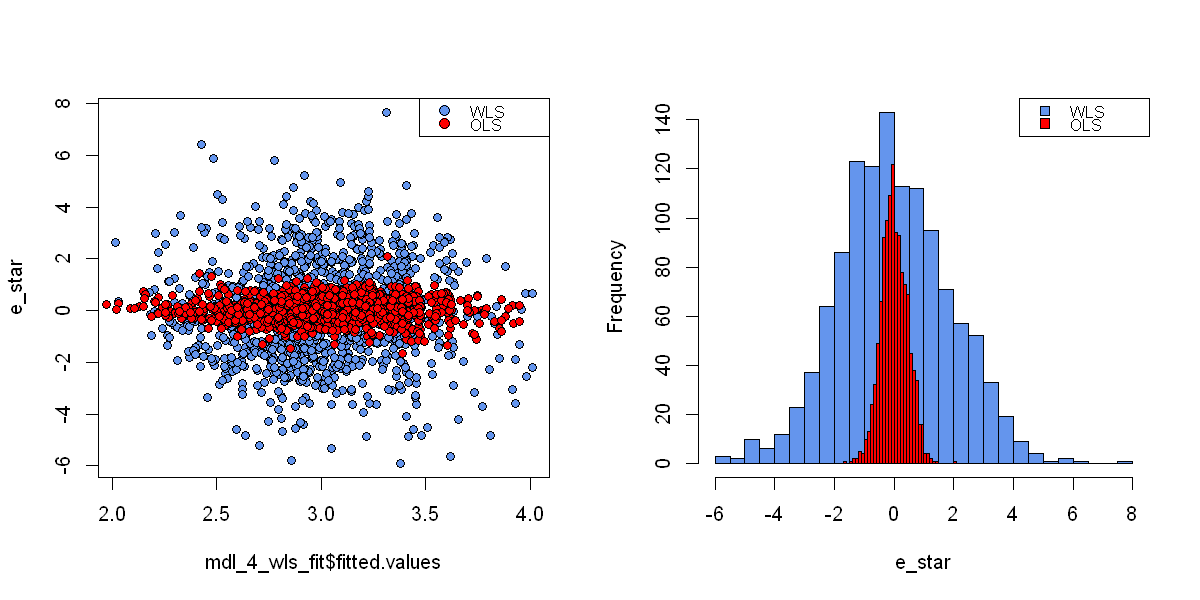

In [122]:
par(mfrow = c(1, 2))
plot(mdl_4_wls_fit$fitted.values, e_star, pch = 21, col = "black", bg = "cornflowerblue")
points(mdl_4_fit$fitted.values, mdl_4_fit$residuals, pch = 21, col = "black", bg = "red")
legend("topright", legend = c("WLS", "OLS"), pch = c(21, 21), pt.cex = 1.2, cex = 0.8, pt.bg = c("cornflowerblue", "red"))
#
hist(e_star, breaks = 30, col = "cornflowerblue", main = NULL)
hist(mdl_4_fit$residuals, breaks = 30, col = "red", add = TRUE)
legend("topright", legend = c("WLS", "OLS"), pch = c(22, 22), pt.cex = 1.2, cex = 0.8, pt.bg = c("cornflowerblue", "red"))

We do note that the residual variance is larger **in the transformed data**. Generally, we would hope that WLS (and (F)GLS) would reduce the variance of the residuals. This may indicate, that we need different weights. Newertheless, for now, we will use the WLS model.

Looking at it in a bit more detail:

In [123]:
options(repr.plot.height = 8)

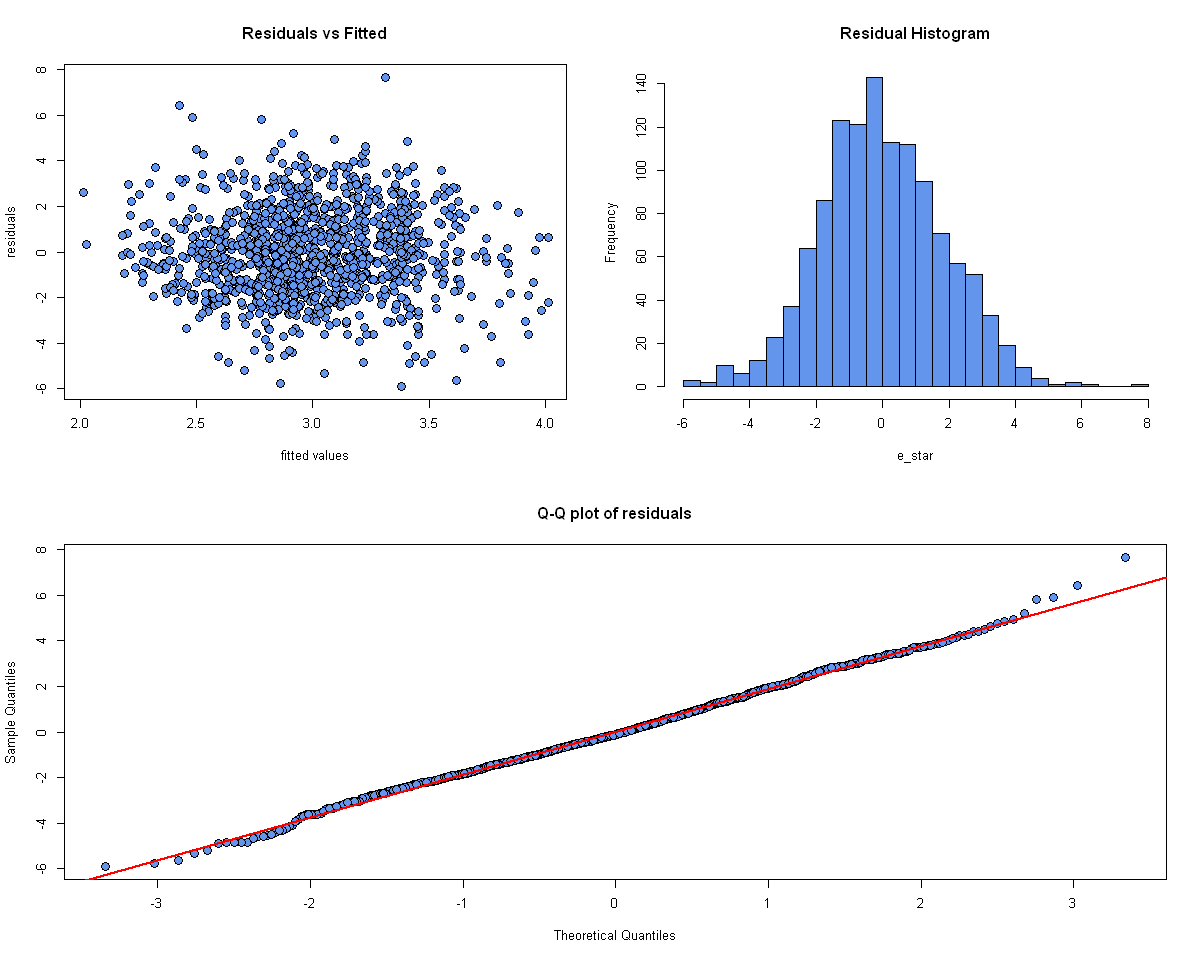

In [124]:
layout(layout_mat)
plot(mdl_4_wls_fit$fitted.values, e_star, type = "p", pch = 21, bg = "cornflowerblue", main = "Residuals vs Fitted", ylab = "residuals", xlab = "fitted values", cex = 1.5)
hist(e_star, col = "cornflowerblue", breaks = 30, main = "Residual Histogram")
qqnorm(e_star, main = "Q-Q plot of residuals", pch = 21, bg = "cornflowerblue", cex = 1.5)
qqline(e_star, col = "red", lwd = 2)

Visually, the scatterplot of the residuals **may be better**, but we are not sure. Thankfully, we know some tests, which can help us out.

In [125]:
# Breusch-Godfrey Test
print(lmtest::bgtest(mdl_4_wls_fit, order = 2))


	Breusch-Godfrey test for serial correlation of order up to 2

data:  mdl_4_wls_fit
LM test = 0.11088, df = 2, p-value = 0.9461



In [126]:
# Breusch-Pagan test for WLS
print(car::ncvTest(mdl_4_wls_fit))

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 2.815815, Df = 1, p = 0.093339


see also [this answer](https://stats.stackexchange.com/a/193070) for comparison between `bptest()` and `ncvTest()`. Note that `ncvTest()` supports either a weighted or unweighted linear model, produced by `lm`. 

Another discussion can be found [here](http://r.789695.n4.nabble.com/Contradictory-results-between-different-heteroskedasticity-tests-td4643544.html):

- for `lmtest::bptest()` - the error variance is a function of a linear combination of the predictors in the model;
- for `car::ncvTest()` - the error variance is a function of the expectation of Y (variance formula ~ fitted.values). For the weighted model, `ncvTest()` uses the Pearson residuals and hence takes the weights into account.

----

Unfortunately, even specifying `varformula` to use the fitted values, the result does not match that of `ncvTest()`:

In [127]:
# BP test doesn't give the same results for the WLS case"
lmtest::bptest(mdl_4_wls_fit, varformula = ~ fitted.values(mdl_4_wls_fit), studentize = FALSE)


	Breusch-Pagan test

data:  mdl_4_wls_fit
BP = 16.401, df = 1, p-value = 5.127e-05


This is something to keep in mind in case you ever need to carry out a WLS and check its residuals.

----

While the $p$-value is larger - though $p = 0.09$ is cutting it close to the $5\%$ significance level - we would not reject the null hypothesis that the residuals are homoskedastic. 

So, our WLS procedure **did** take into account all of the heteroskedasticity. 

Note that since we calculated the weights using the same exogeneous variables, as in the main model, it may be very likely, that the residuals variance depends on some **additional exogeneous variables**, which we did not include in our main model. 

Though in this case, it appears that we have accounted for most of the significant heteroskedasticity.

On the other hand, if there **were** still some heteroskedasticity - we would need to correct our WLS standard errors. We can do this quite easily with:

In [128]:
tmp_out <- lmtest::coeftest(mdl_4_wls_fit, vcov. = sandwich::vcovHC(mdl_4_wls_fit, type = "HC3"))
print(round(tmp_out, 4))


t test of coefficients:

                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)         1.4620     0.2383  6.1352   <2e-16 ***
educ                0.0542     0.0280  1.9388   0.0528 .  
I(educ^2)           0.0017     0.0010  1.6588   0.0974 .  
exper               0.0483     0.0070  6.9074   <2e-16 ***
I(exper^2)         -0.0005     0.0001 -6.4015   <2e-16 ***
south              -0.0687     0.0281 -2.4438   0.0147 *  
metro              -0.3790     0.1419 -2.6712   0.0077 ** 
female             -1.1726     0.3247 -3.6107   0.0003 ***
metro:female        1.0163     0.3254  3.1232   0.0018 ** 
educ:metro          0.0364     0.0110  3.3123   0.0010 ***
educ:female         0.0705     0.0234  3.0093   0.0027 ** 
educ:exper         -0.0012     0.0004 -3.1485   0.0017 ** 
educ:metro:female  -0.0718     0.0234 -3.0688   0.0022 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



We would again return to the conclusion that we should remove $educ^2$ as it is insignificant (though we would get different results with `HC0`, `HC1` and `HC2`).

We can conclude the following:
    
- the WLS correction did take into account all possible heteroskedasticity. Though the $p$-value of the BP test of the WLS residuals is close to the $5\%$ significance level.
- After correcting WLS standard errors with HCE, under the assumption that the residuals from WLS were still heteroskedastic, we came to the same conclusion regarding $educ^2$ - we should remove it from our model as it is not significantly different from zero.

-----

-----

-----

If, even after having carried out all of these tests and different estimation methods, we would still like to account for the any remaining heteroskedasticity, we could look at:

- **examine residual vs explanatory variable scatter plots to get better weights** - maybe there is a specific explanatory variable, which we should use as a weight?
- **remove outliers** - if there are a few points which significantly skew the data - we should remove, as long as they are either due to an error, or some kind of exception. On the other hand, the residual vs fitted scatter plot does not indicate that any single outlier could be the **only cause** for heteroskedasticity. So it will most likely not completely fix heteroskedasticity.
- **get additional observations and additional variables** - as we have seen fro the full dataset - there are many more additional variables, and observations, which may result in a different model (as an example, the variable `black` is significant in the full dataset).

-----

-----

-----

For interests sake, if we were to compare the residuals for the original data - they would have minor differences

In [129]:
options(repr.plot.height = 5)

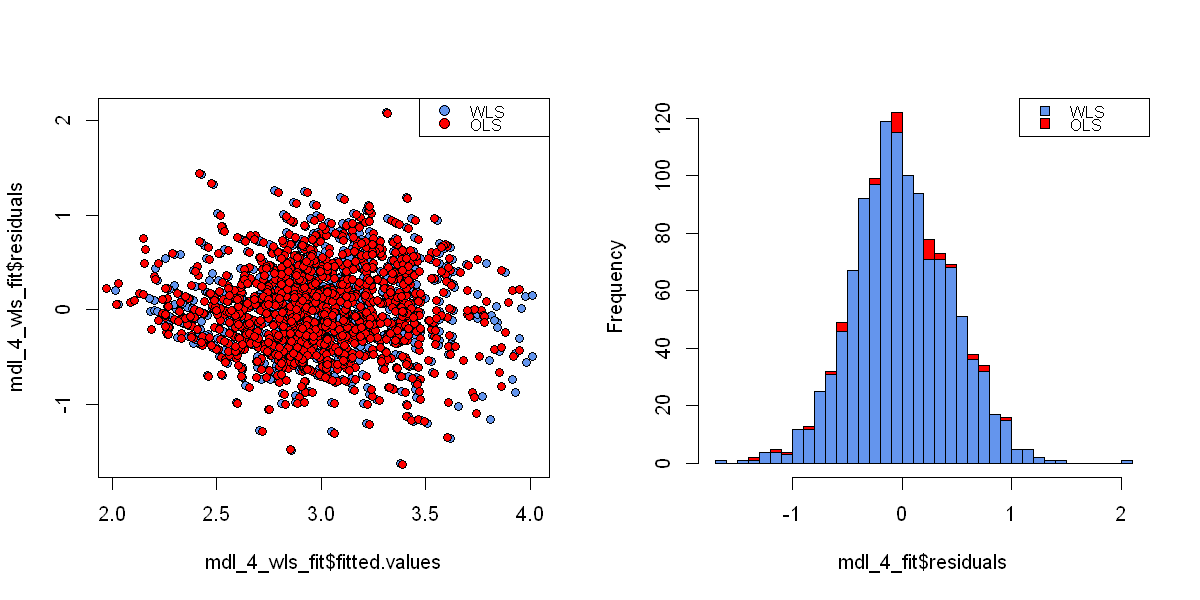

In [130]:
par(mfrow = c(1, 2))
plot(mdl_4_wls_fit$fitted.values, mdl_4_wls_fit$residuals, pch = 21, col = "black", bg = "cornflowerblue")
points(mdl_4_fit$fitted.values, mdl_4_fit$residuals, pch = 21, col = "black", bg = "red")
legend("topright", legend = c("WLS", "OLS"), pch = c(21, 21), pt.cex = 1.2, cex = 0.8, pt.bg = c("cornflowerblue", "red"))
#
hist(mdl_4_fit$residuals, breaks = 30, col = "red", main = NULL)
hist(mdl_4_wls_fit$residuals, breaks = 30, col = "cornflowerblue", add = TRUE)
legend("topright", legend = c("WLS", "OLS"), pch = c(22, 22), pt.cex = 1.2, cex = 0.8, pt.bg = c("cornflowerblue", "red"))

Again, since WLS fits a model on the transformed data, we are interested if the residuals, from the fitted transformed data adhere to our **(MR.3) - (MR.6)** assumptions.